In [ ]:
/content/drive/MyDrive/mtb/sensor.csv

In [ ]:
import os
import numpy as np
import pandas as pd
import datetime
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import glob

 Load the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mtb/sensor.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [ ]:
df.shape


(220320, 55)

In [ ]:
df.head()


Unnamed: 0            timestamp  ...  sensor_51  machine_status
0           0  2018-04-01 00:00:00  ...   201.3889          NORMAL
1           1  2018-04-01 00:01:00  ...   201.3889          NORMAL
2           2  2018-04-01 00:02:00  ...   203.7037          NORMAL
3           3  2018-04-01 00:03:00  ...   203.1250          NORMAL
4           4  2018-04-01 00:04:00  ...   201.3889          NORMAL

[5 rows x 55 columns]

In [ ]:
del df['Unnamed: 0']


In [ ]:

# Let's count the unique values of one of the columns
df['machine_status'].value_counts(dropna=False).head()


NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [ ]:
# Let's count the unique values of one of the columns
df['sensor_15'].value_counts(dropna=False).head()

NaN    220320
Name: sensor_15, dtype: int64

In [ ]:
df.describe().T

count        mean  ...          75%          max
sensor_00  210112.0    2.372221  ...     2.499826     2.549016
sensor_01  219951.0   47.591611  ...    49.479160    56.727430
sensor_02  220301.0   50.867392  ...    52.777770    56.032990
sensor_03  220301.0   43.752481  ...    45.312500    48.220490
sensor_04  220301.0  590.673936  ...   637.615723   800.000000
sensor_05  220301.0   73.396414  ...    80.912150    99.999880
sensor_06  215522.0   13.501537  ...    14.539930    22.251160
sensor_07  214869.0   15.843152  ...    16.427950    23.596640
sensor_08  215213.0   15.200721  ...    15.697340    24.348960
sensor_09  215725.0   14.799210  ...    15.118630    25.000000
sensor_10  220301.0   41.470339  ...    47.463760    76.106860
sensor_11  220301.0   41.918319  ...    49.656540    60.000000
sensor_12  220301.0   29.136975  ...    34.939730    45.000000
sensor_13  220301.0    7.078858  ...    12.859520    31.187550
sensor_14  220299.0  376.860041  ...   420.997100   500.000000
sensor_15       0.0         NaN  ...          NaN          NaN
sensor_16  220289.0  416.472892  ...   464.302700   739.741500
sensor_17  220274.0  421.127517  ...   466.857075   599.999939
sensor_18  220274.0    2.303785  ...     2.587682     4.873250
sensor_19  220304.0  590.829775  ...   667.146700   878.917900
sensor_20  220304.0  360.805165  ...   400.088400   448.907900
sensor_21  220304.0  796.225942  ...   882.129900  1107.526000
sensor_22  220279.0  459.792815  ...   534.254850   594.061100
sensor_23  220304.0  922.609264  ...  1090.808000  1227.564000
sensor_24  220304.0  556.235397  ...   628.607725  1000.000000
sensor_25  220284.0  649.144799  ...   750.357125   839.575000
sensor_26  220300.0  786.411781  ...   919.104775  1214.420000
sensor_27  220304.0  501.506589  ...   536.274550  2000.000000
sensor_28  220304.0  851.690339  ...  1043.976500  1841.146000
sensor_29  220248.0  576.195305  ...   744.021475  1466.281000
sensor_30  220059.0  614.596442  ...   697.222200  1600.000000
sensor_31  220304.0  863.323100  ...   981.249900  1800.000000
sensor_32  220252.0  804.283915  ...   943.877625  1839.211000
sensor_33  220304.0  486.405980  ...   555.163225  1578.600000
sensor_34  220304.0  234.971776  ...   316.844950   425.549800
sensor_35  220304.0  427.129817  ...   528.891025   694.479126
sensor_36  220304.0  593.033876  ...   837.333025   984.060700
sensor_37  220304.0   60.787360  ...    90.821928   174.901200
sensor_38  220293.0   49.655946  ...    53.645830   417.708300
sensor_39  220293.0   36.610444  ...    39.062500   547.916600
sensor_40  220293.0   68.844530  ...    77.864580   512.760400
sensor_41  220293.0   35.365126  ...    37.760410   420.312500
sensor_42  220293.0   35.453455  ...    36.979164   374.218800
sensor_43  220293.0   43.879591  ...    46.614580   408.593700
sensor_44  220293.0   42.656877  ...    45.138890  1000.000000
sensor_45  220293.0   43.094984  ...    44.849540   320.312500
sensor_46  220293.0   48.018585  ...    51.215280   370.370400
sensor_47  220293.0   44.340903  ...    46.585650   303.530100
sensor_48  220293.0  150.889044  ...   208.333300   561.632000
sensor_49  220293.0   57.119968  ...    60.763890   464.409700
sensor_50  143303.0  183.049260  ...   219.907400  1000.000000
sensor_51  204937.0  202.699667  ...   216.724500  1000.000000

[52 rows x 8 columns]

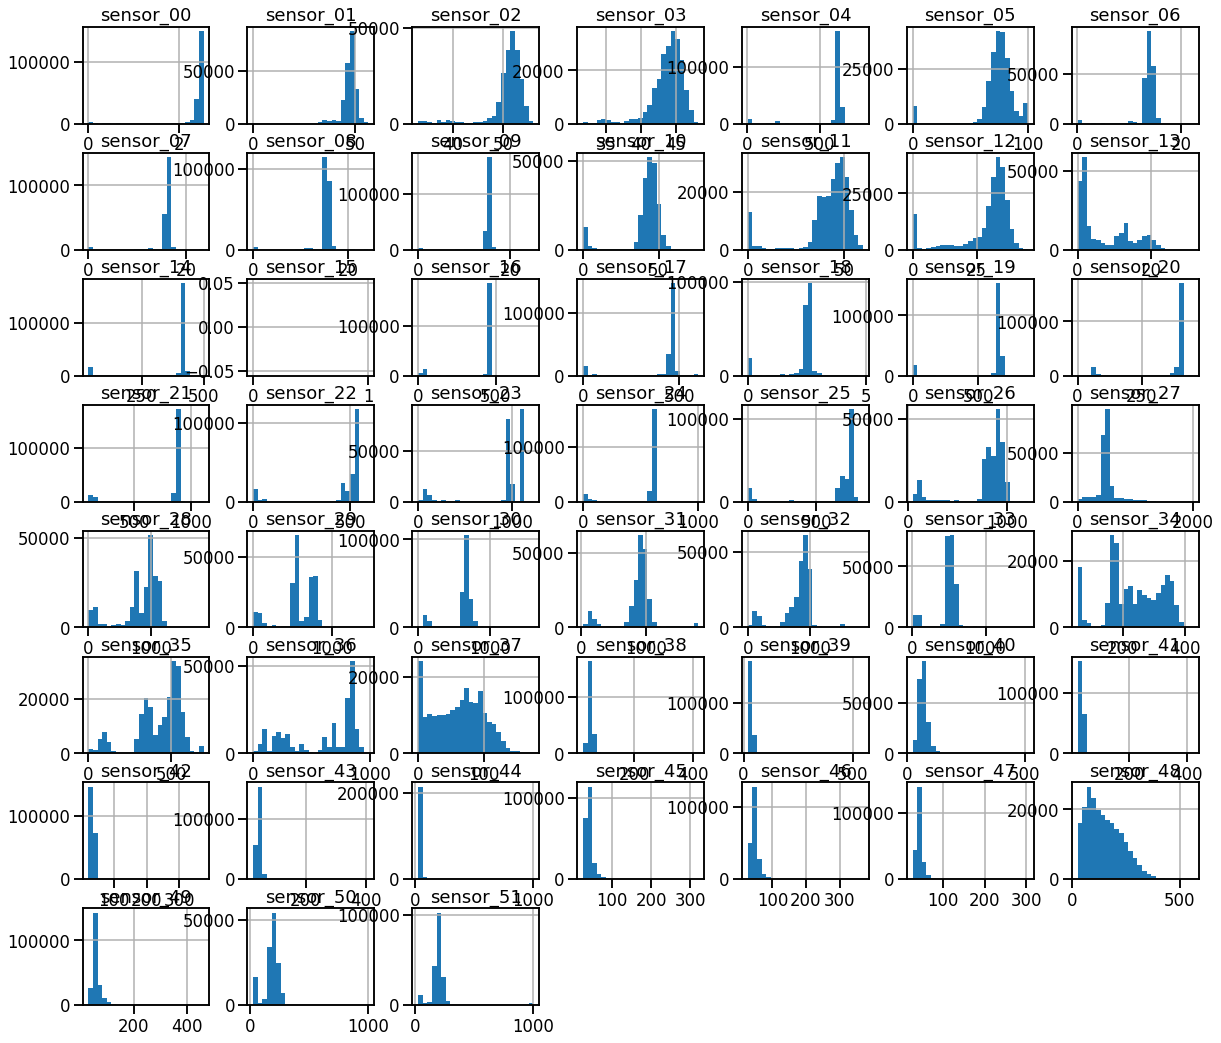

In [ ]:
# Histogram
df.hist(df.columns, bins=25, layout=(8,7), figsize=(20, 18))
plt.show()

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

In [ ]:
# Entire "sensor_15" column is NaN therefore removing the entire column from the data set
del df['sensor_15']

In [ ]:

# Function that calculates the percentage of missing values
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

In [ ]:
# Let's take a look at top ten columns with missing values
calc_percent_NAs(df).head(10)

percent
sensor_50  0.349569
sensor_51  0.069821
sensor_00  0.046333
sensor_07  0.024741
sensor_08  0.023180
sensor_06  0.021777
sensor_09  0.020856
sensor_01  0.001675
sensor_30  0.001185
sensor_29  0.000327

In [ ]:
df[['sensor_50', 'sensor_51', 'sensor_00', 'sensor_07', 'sensor_08', 'sensor_06', 'sensor_09']].describe().T


count        mean  ...         75%          max
sensor_50  143303.0  183.049260  ...  219.907400  1000.000000
sensor_51  204937.0  202.699667  ...  216.724500  1000.000000
sensor_00  210112.0    2.372221  ...    2.499826     2.549016
sensor_07  214869.0   15.843152  ...   16.427950    23.596640
sensor_08  215213.0   15.200721  ...   15.697340    24.348960
sensor_06  215522.0   13.501537  ...   14.539930    22.251160
sensor_09  215725.0   14.799210  ...   15.118630    25.000000

[7 rows x 8 columns]

In [ ]:
df_tidy = df.dropna()


In [ ]:
# Let's convert the data type of timestamp column to datatime format
import warnings
warnings.filterwarnings("ignore")
df_tidy['date'] = pd.to_datetime(df_tidy['timestamp'])
del df_tidy['timestamp']

In [ ]:
df_tidy = df_tidy.set_index('date')
df_tidy.head()

sensor_00  sensor_01  ...  sensor_51  machine_status
date                                       ...                           
2018-04-01 00:00:00   2.465394   47.09201  ...   201.3889          NORMAL
2018-04-01 00:01:00   2.465394   47.09201  ...   201.3889          NORMAL
2018-04-01 00:02:00   2.444734   47.35243  ...   203.7037          NORMAL
2018-04-01 00:03:00   2.460474   47.09201  ...   203.1250          NORMAL
2018-04-01 00:04:00   2.445718   47.13541  ...   201.3889          NORMAL

[5 rows x 52 columns]

In [ ]:
df_tidy.to_csv('step2-output.csv')


In [ ]:
df=pd.read_csv('step2-output.csv')


In [ ]:
df.head()


sensor_00  sensor_01  ...  sensor_51  machine_status
date                                       ...                           
2018-04-01 00:00:00   2.465394   47.09201  ...   201.3889          NORMAL
2018-04-01 00:01:00   2.465394   47.09201  ...   201.3889          NORMAL
2018-04-01 00:02:00   2.444734   47.35243  ...   203.7037          NORMAL
2018-04-01 00:03:00   2.460474   47.09201  ...   203.1250          NORMAL
2018-04-01 00:04:00   2.445718   47.13541  ...   201.3889          NORMAL

[5 rows x 52 columns]

In [ ]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

In [ ]:

# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date', inplace=True)


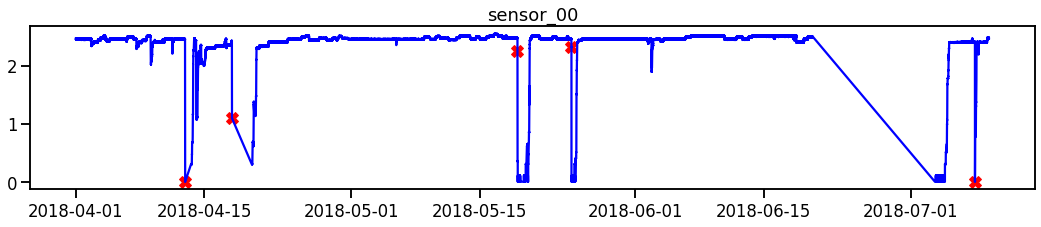

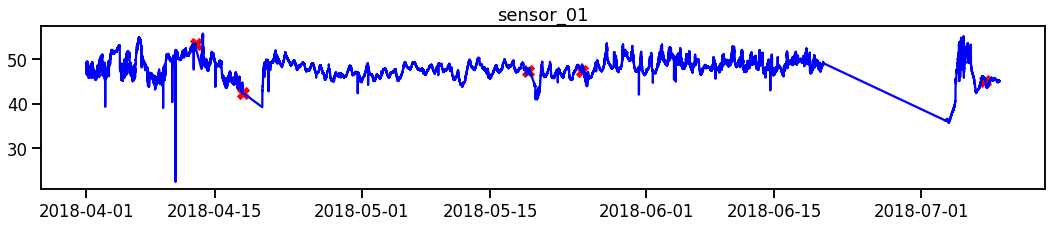

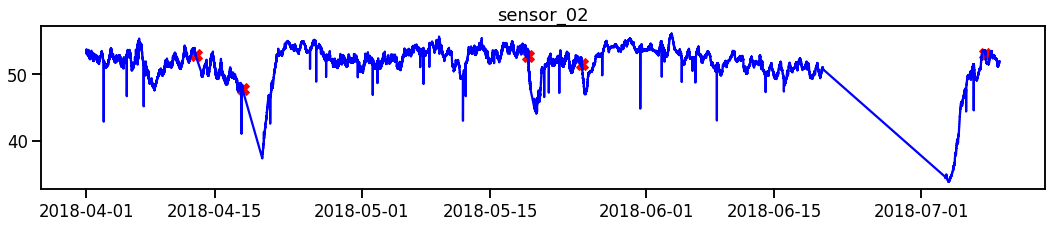

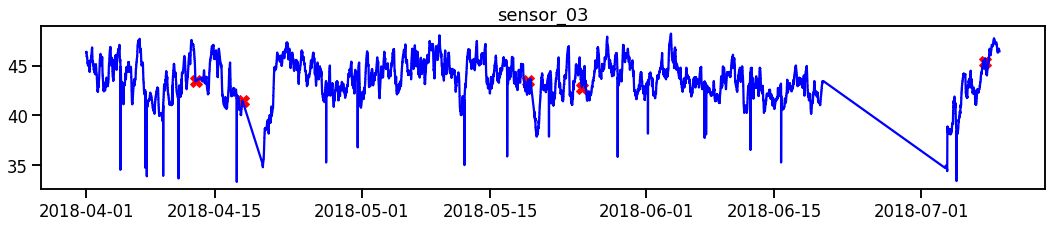

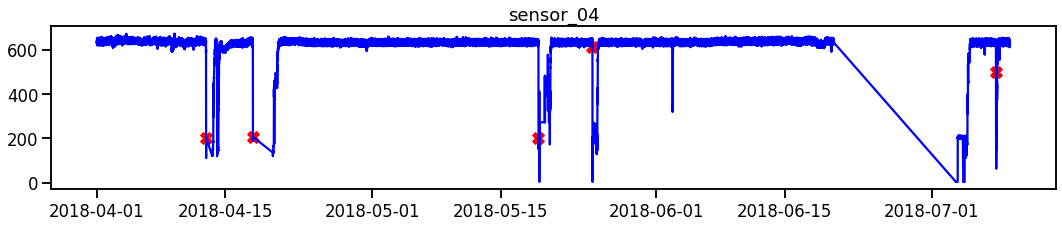

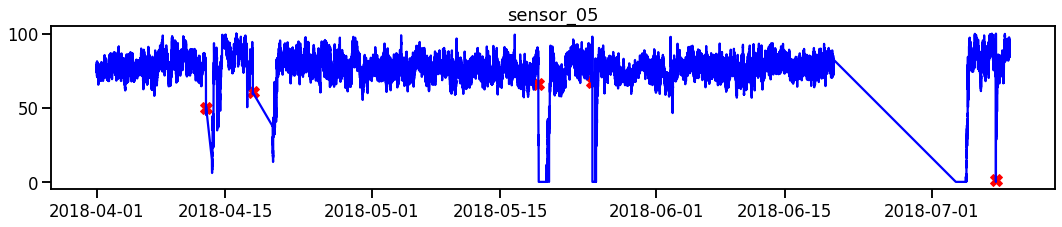

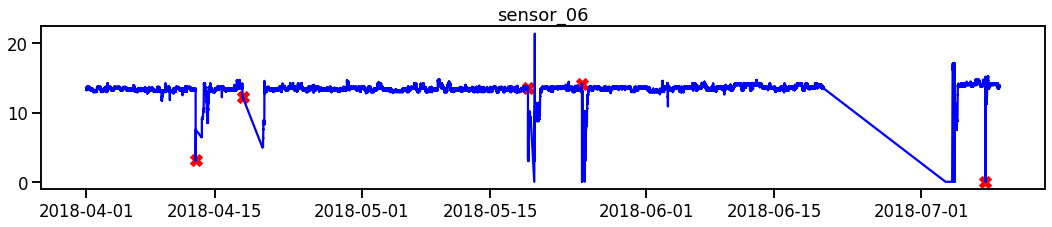

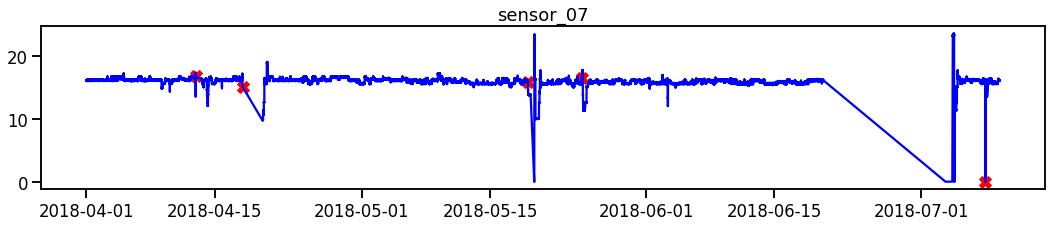

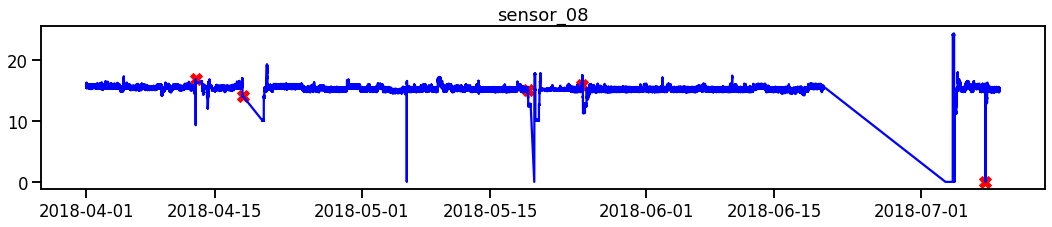

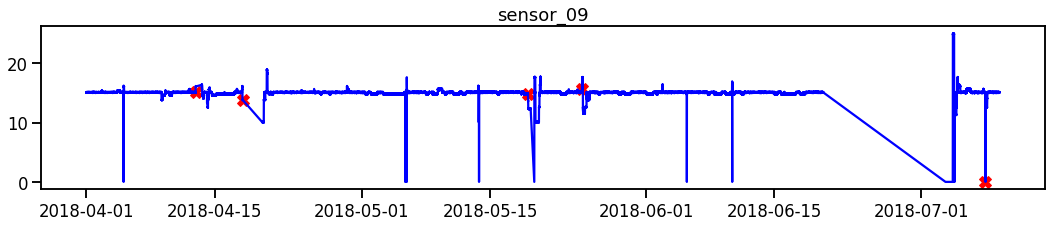

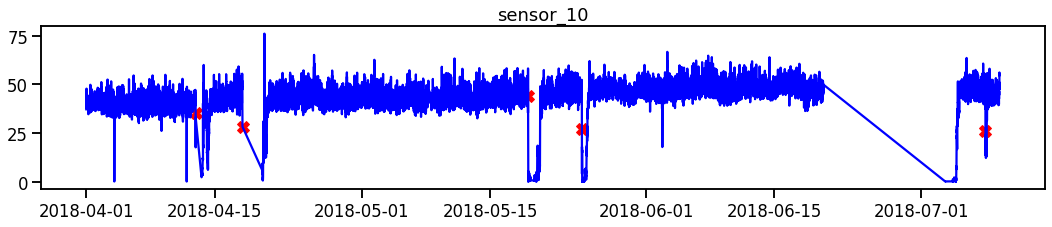

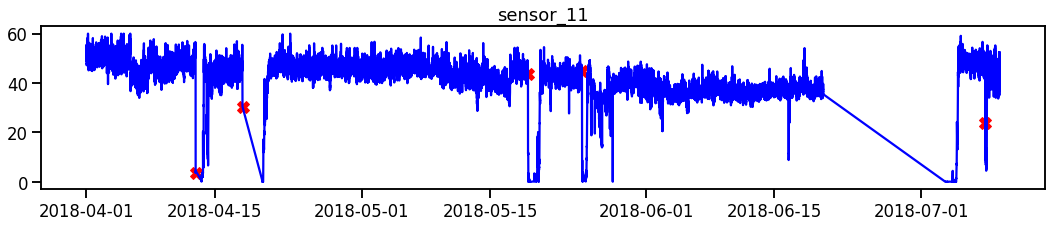

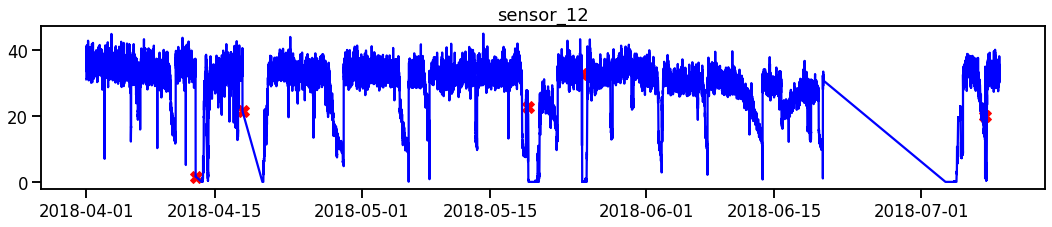

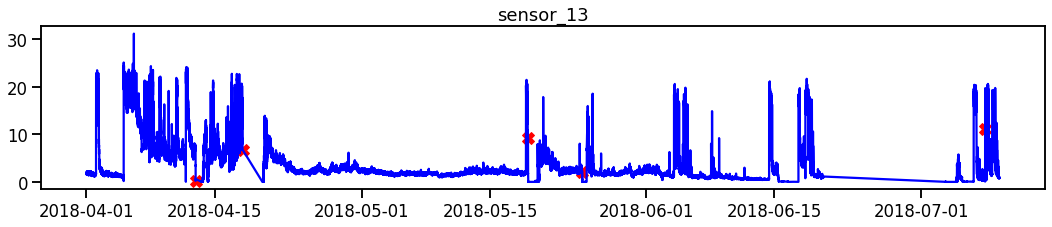

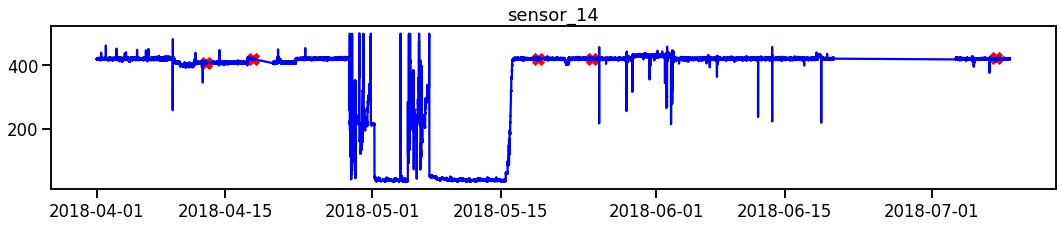

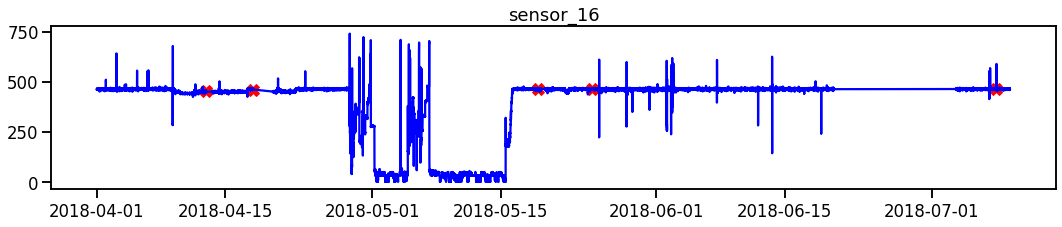

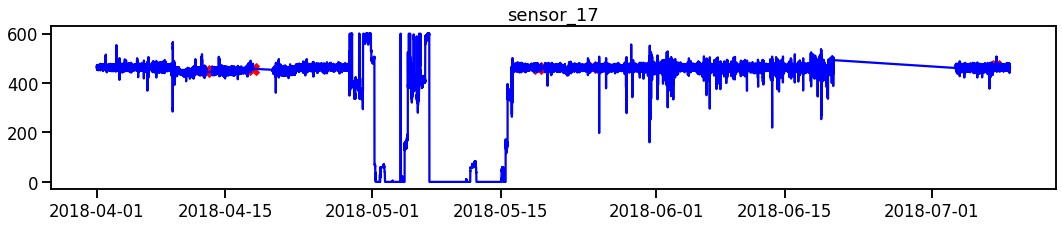

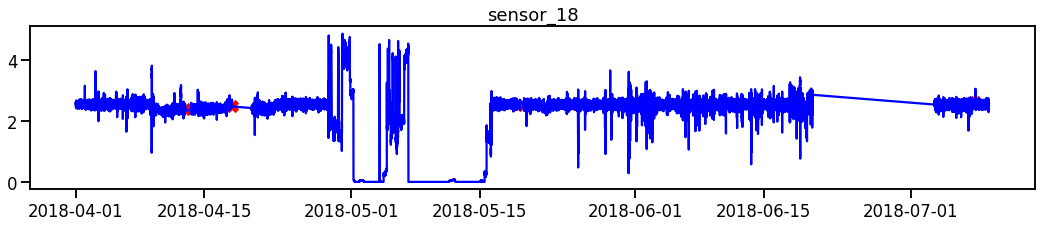

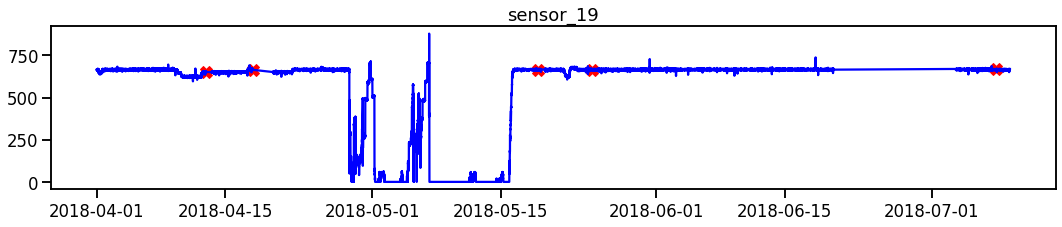

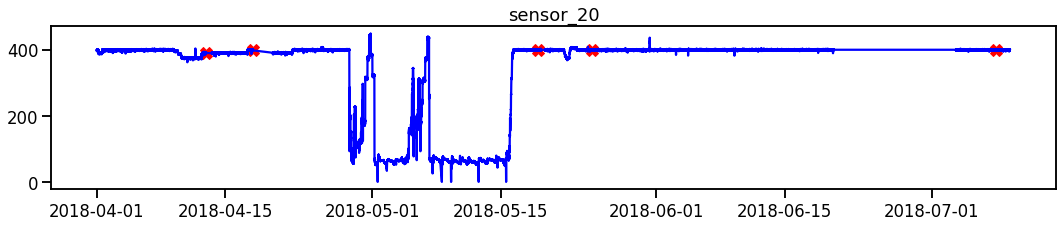

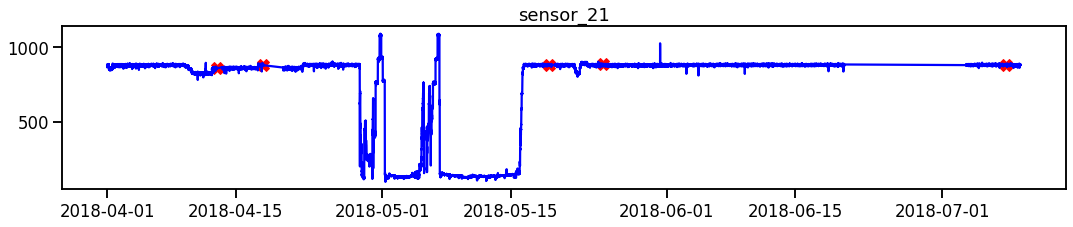

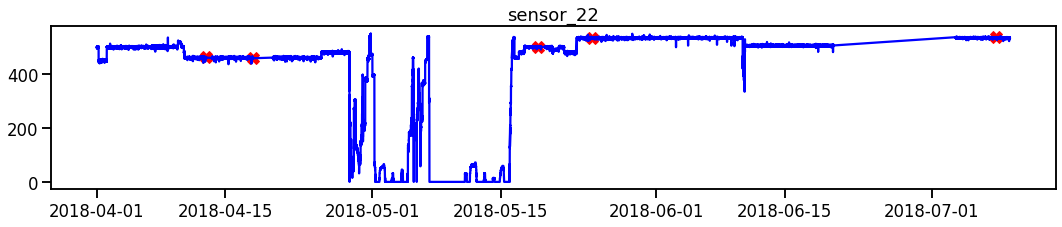

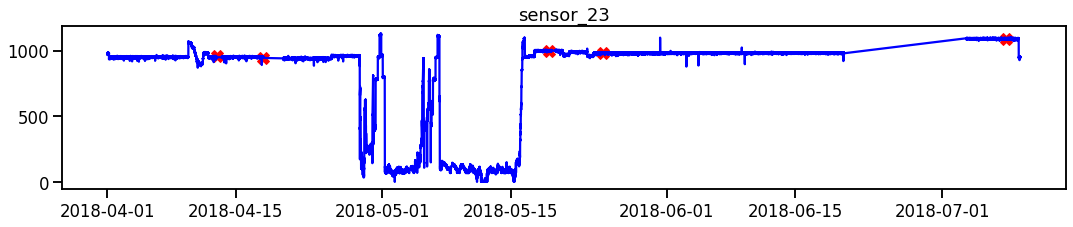

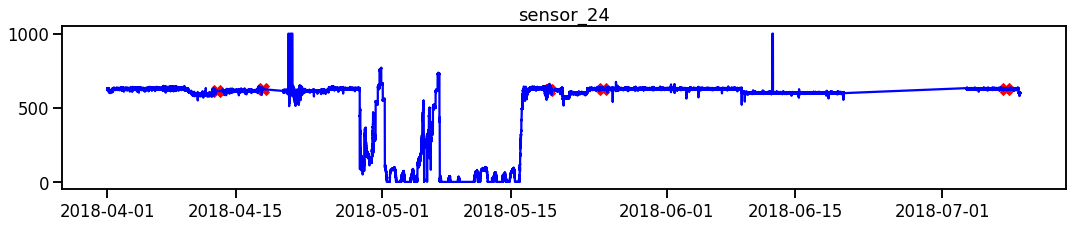

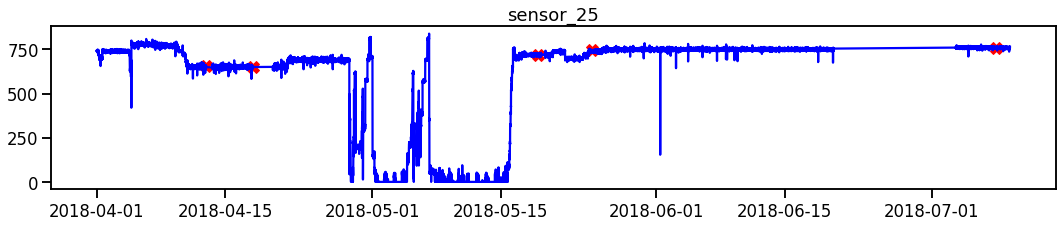

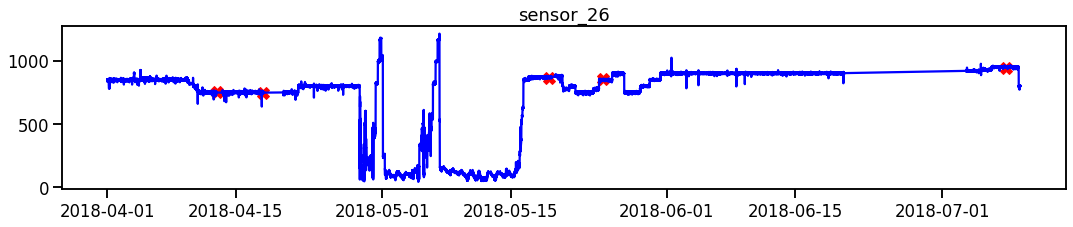

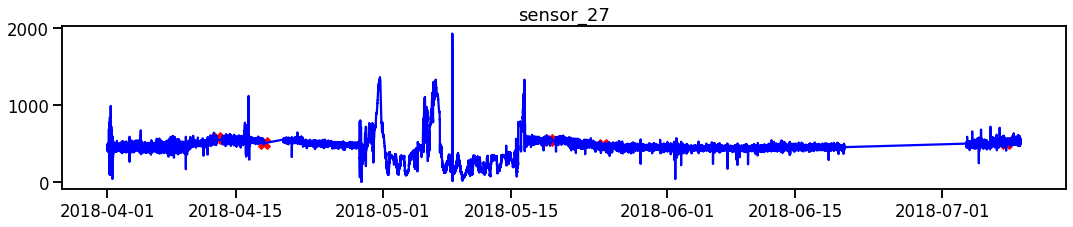

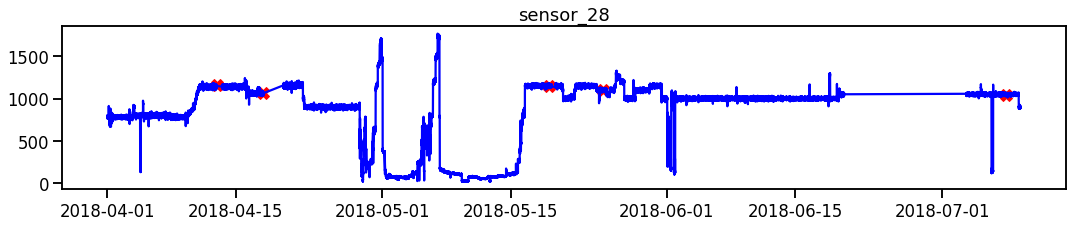

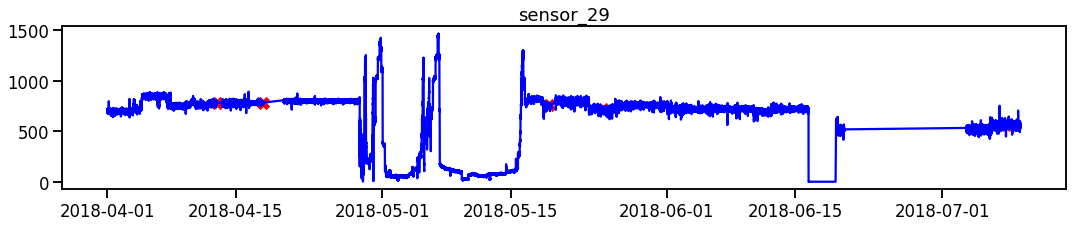

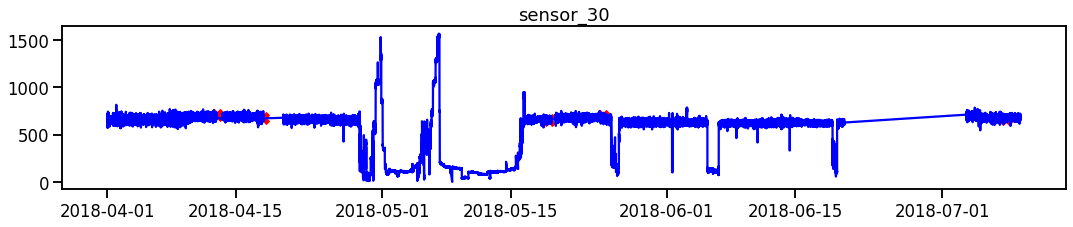

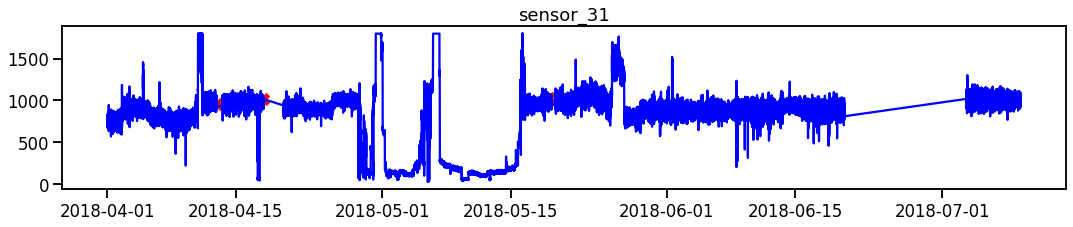

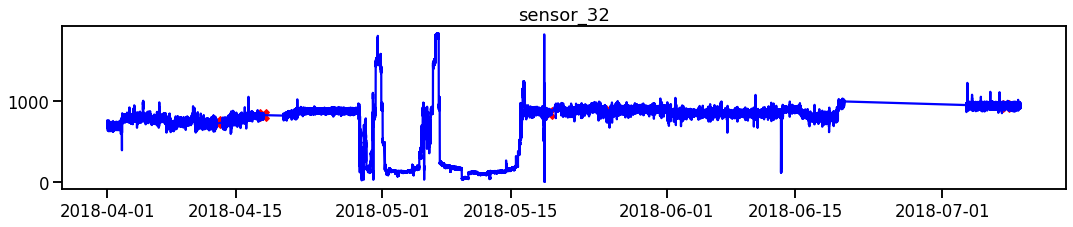

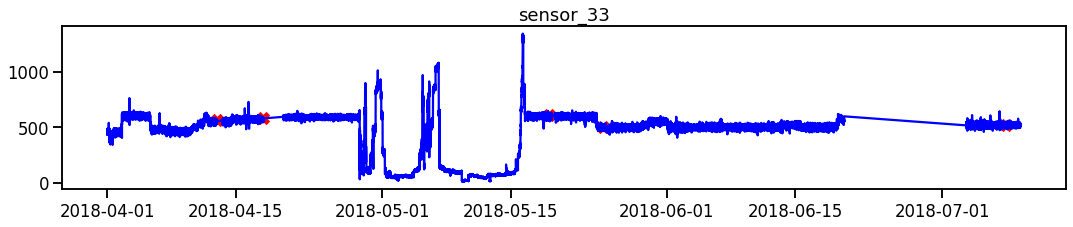

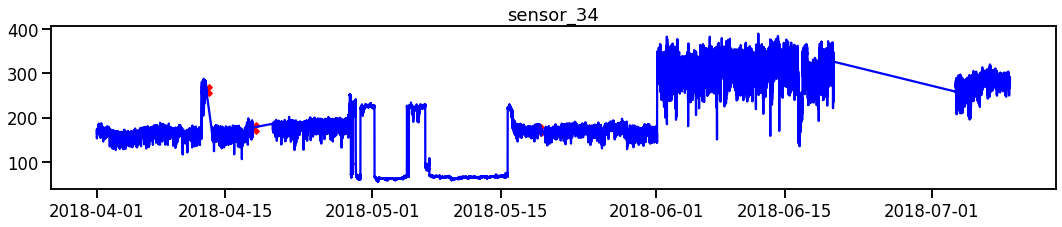

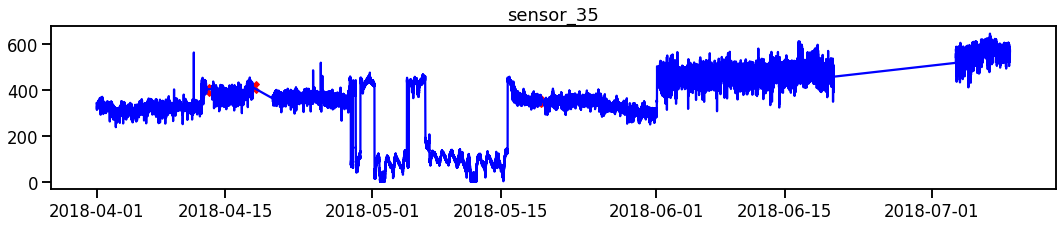

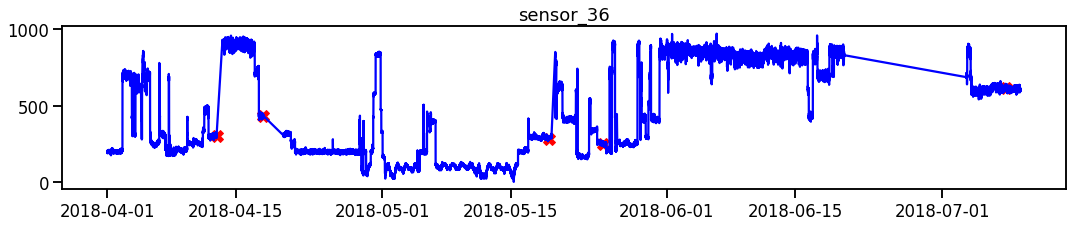

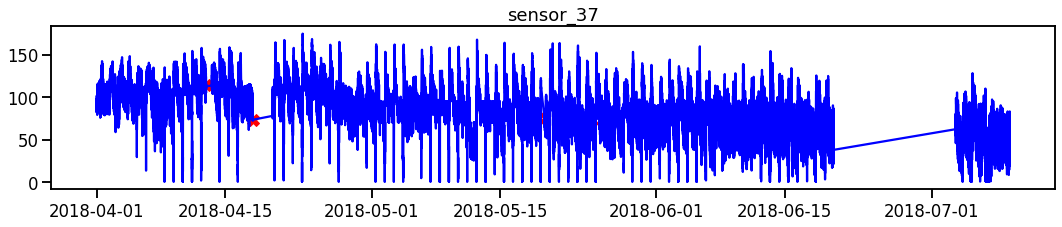

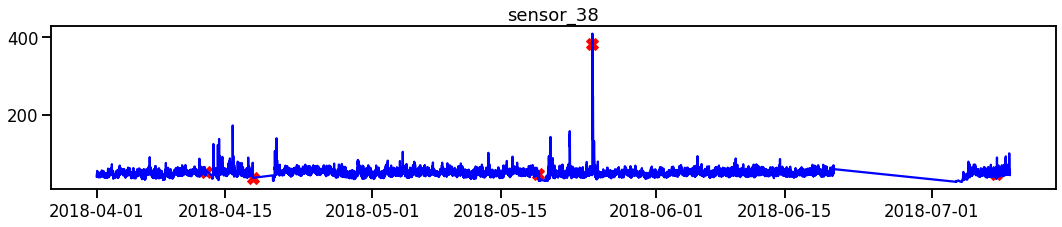

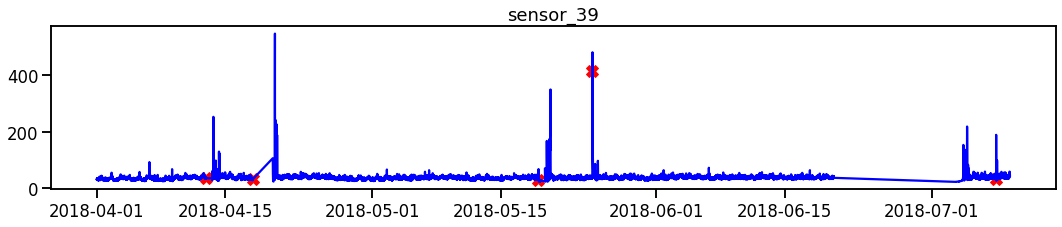

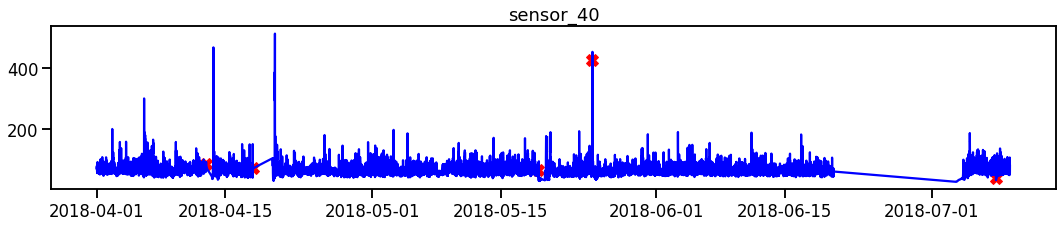

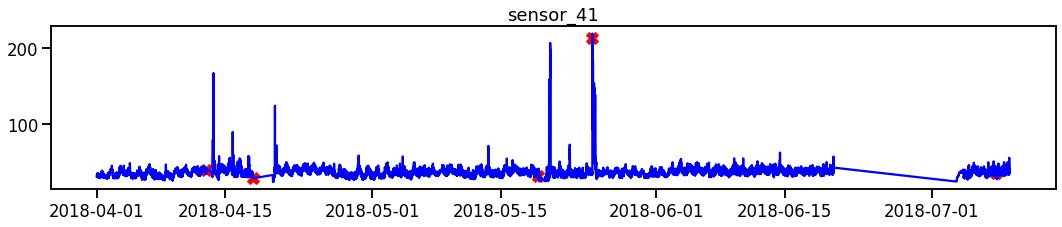

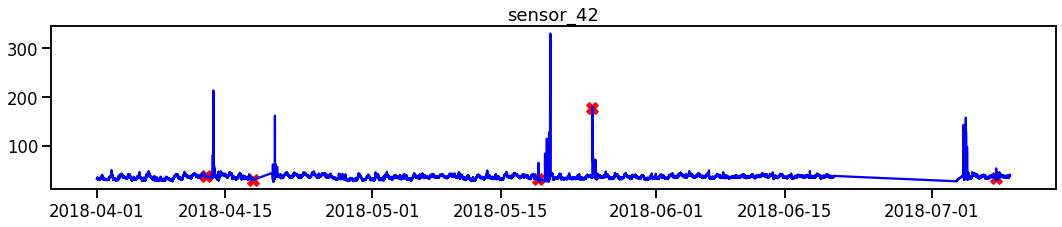

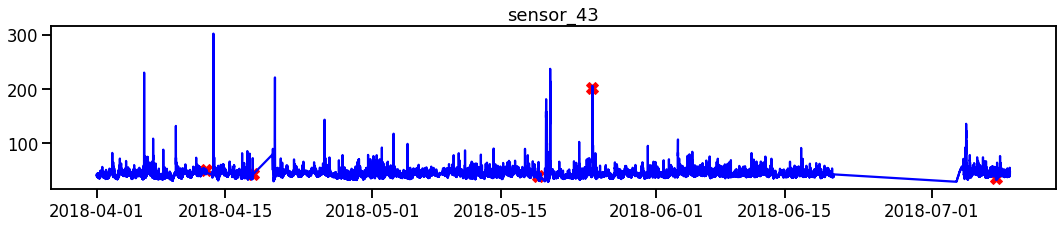

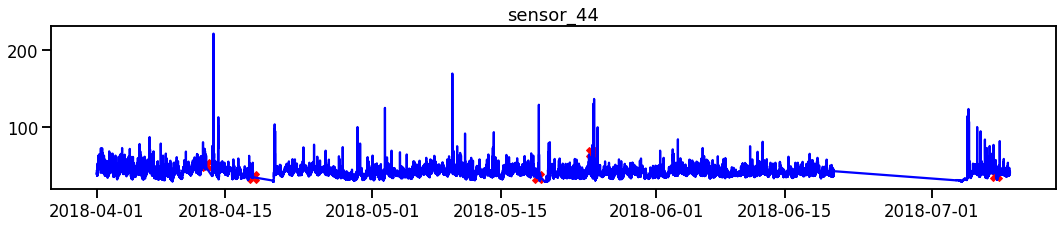

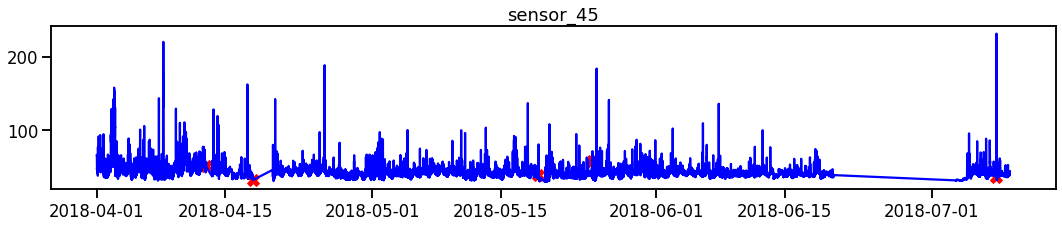

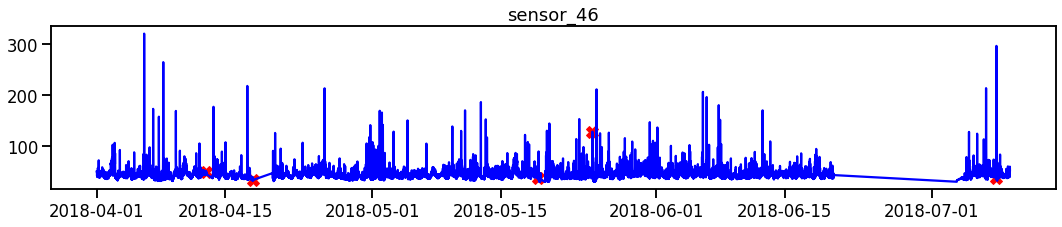

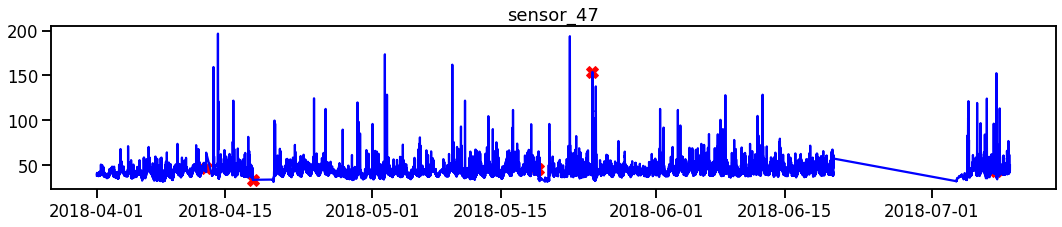

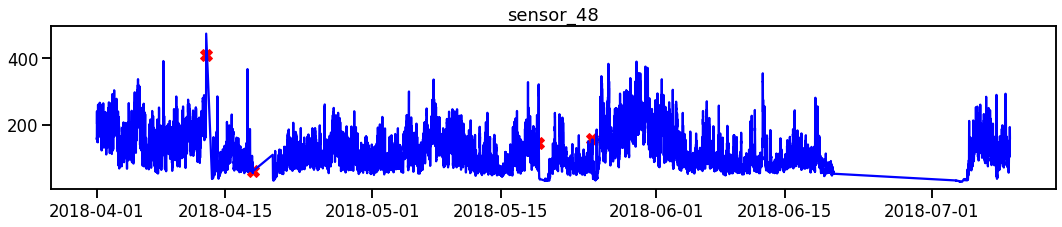

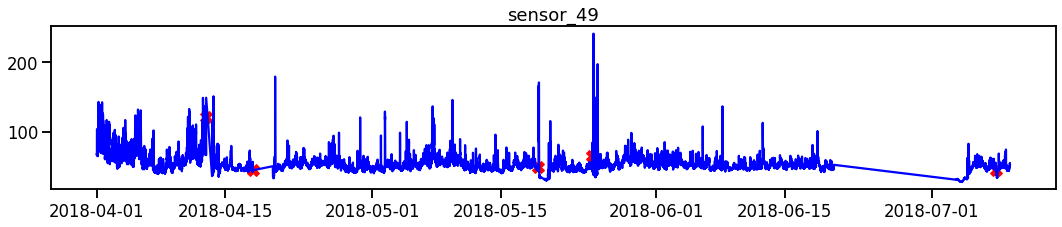

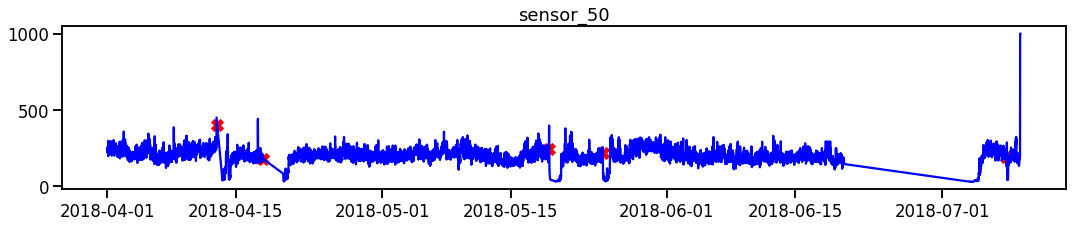

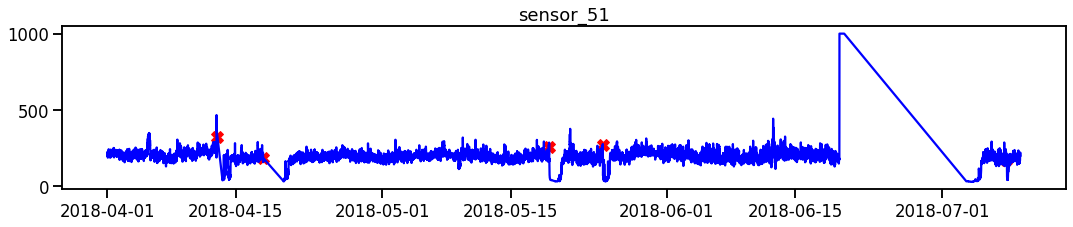

In [ ]:
# Vizualize time series and the BROKEN state (red dots) in the same graph for each sensor
import warnings
# Extract the readings from BROKEN state and resample by daily average
broken = df[df['machine_status']=='BROKEN']
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()
    

In [ ]:

# Resample the entire dataset by daily average
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()

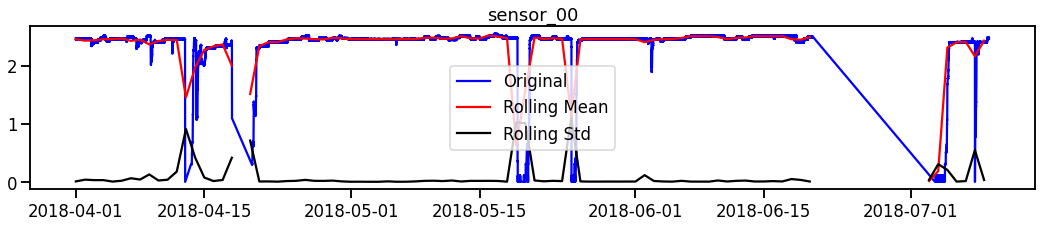

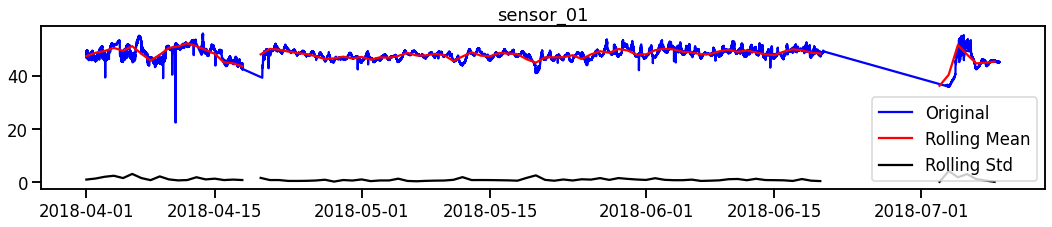

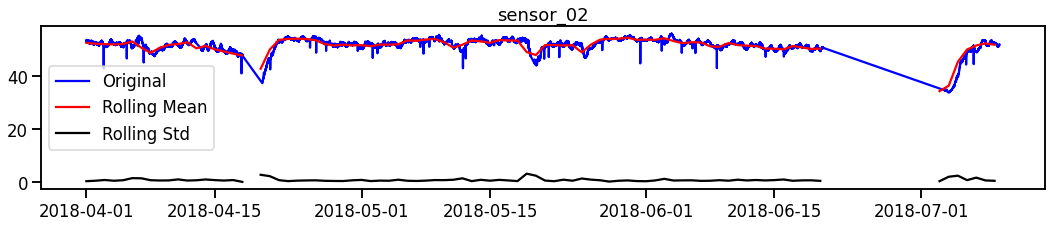

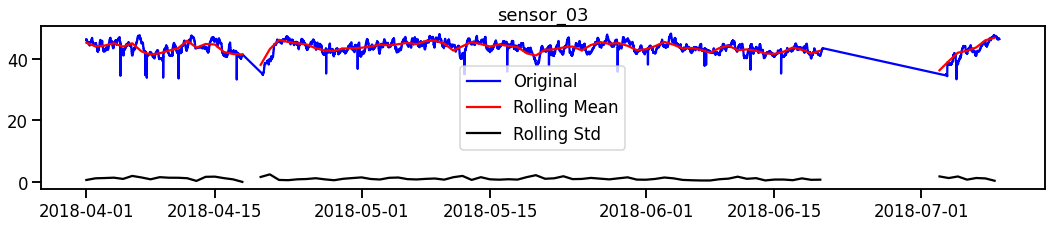

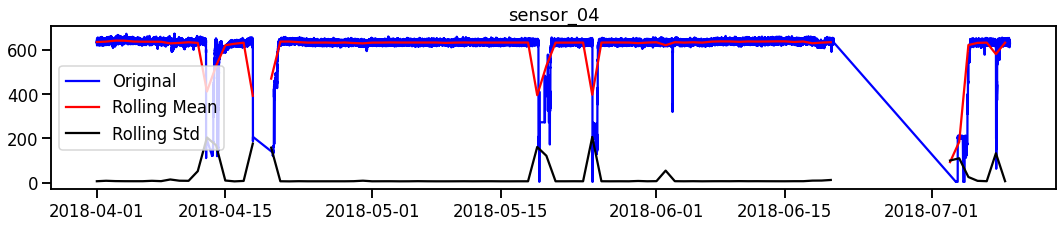

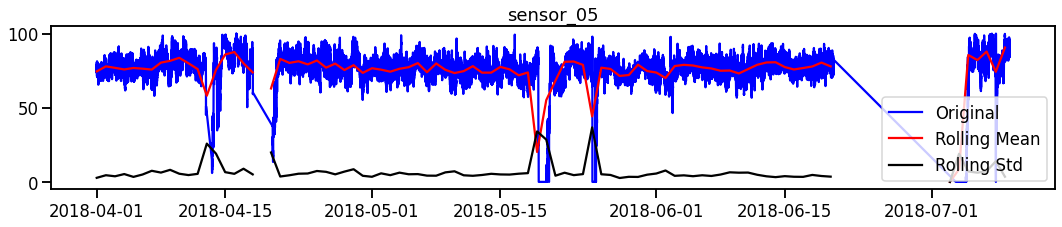

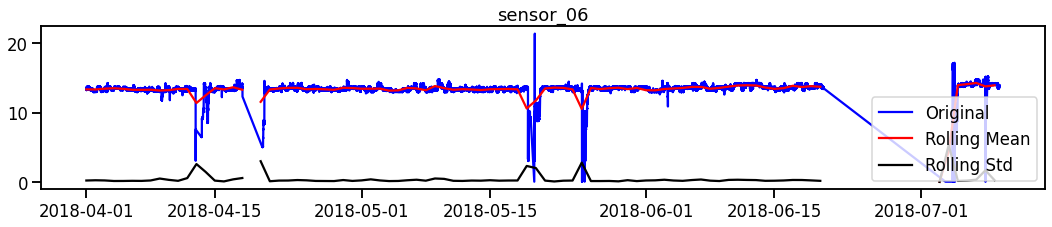

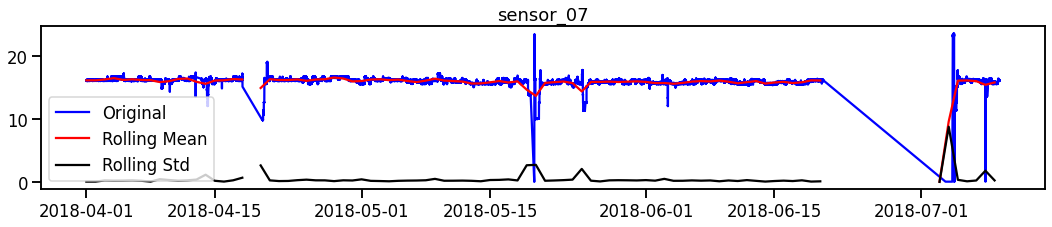

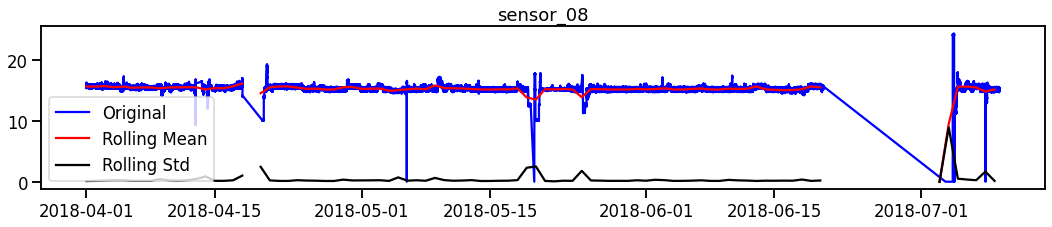

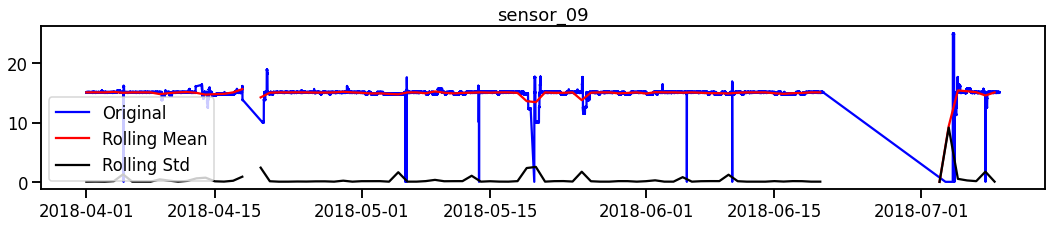

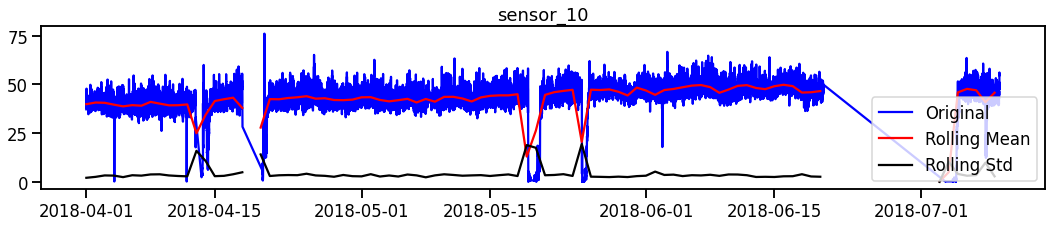

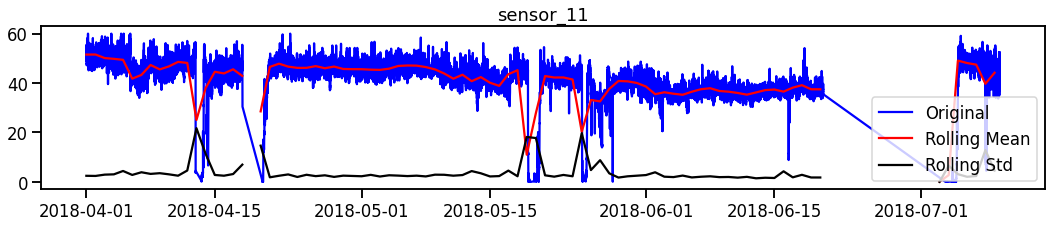

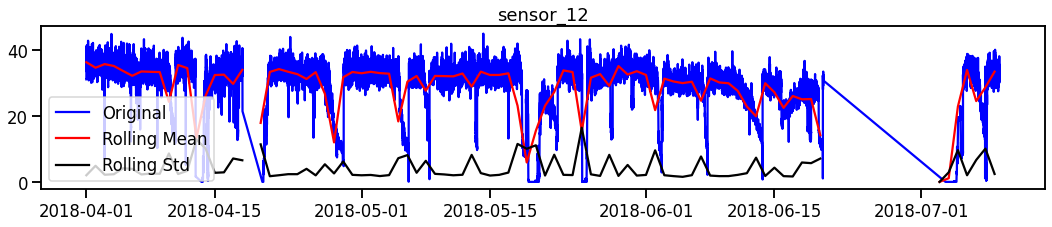

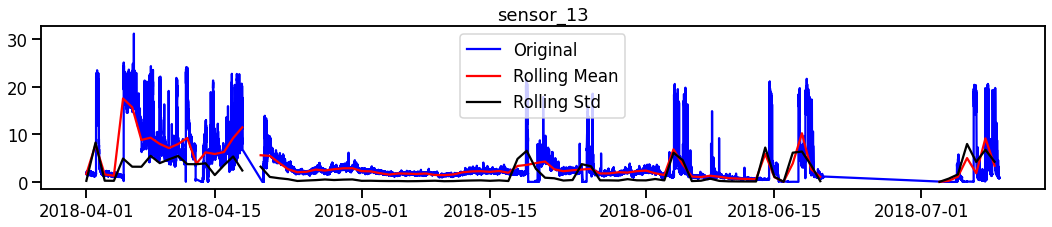

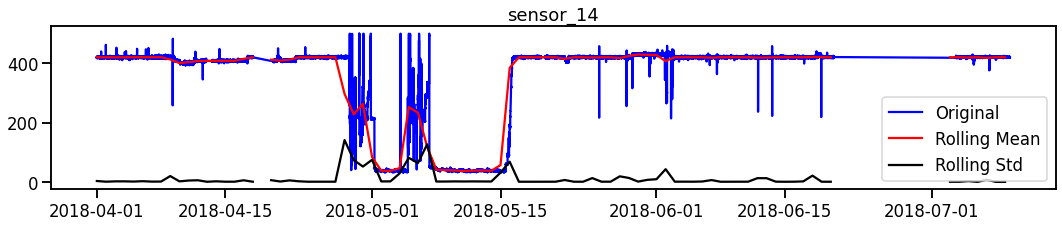

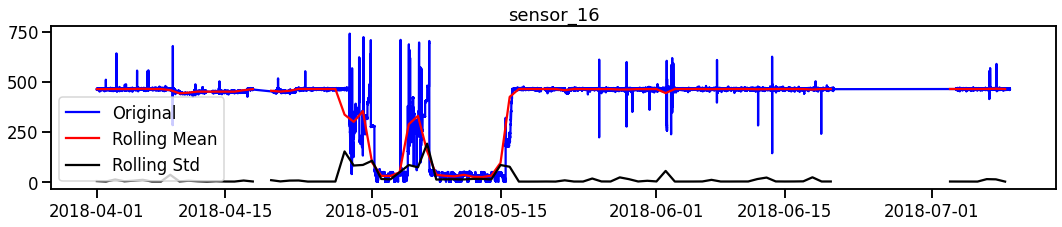

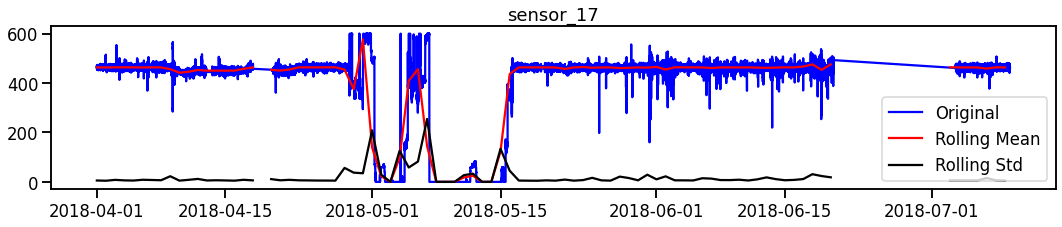

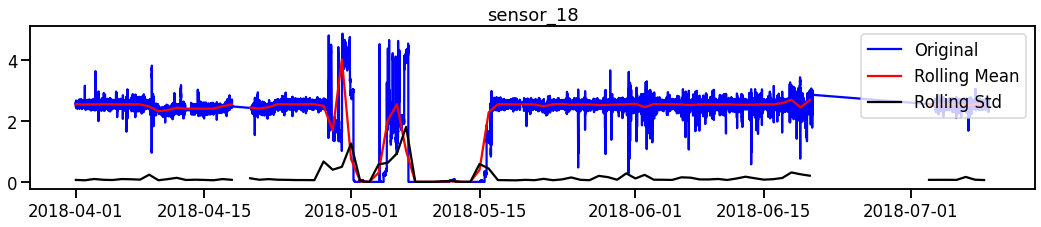

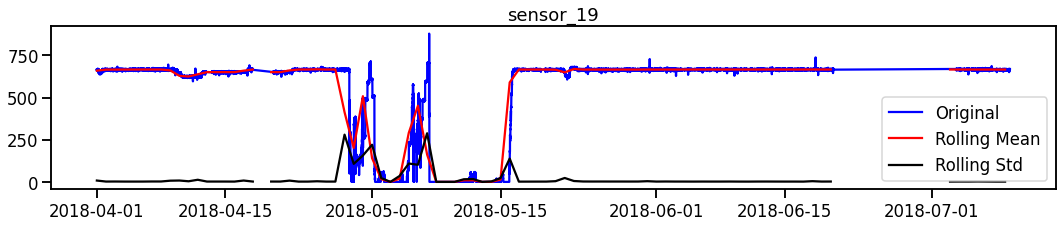

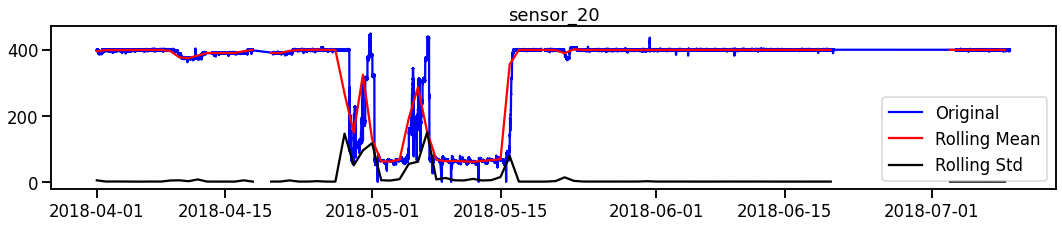

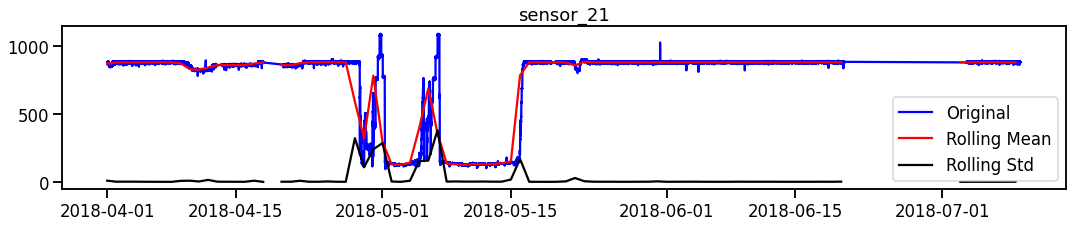

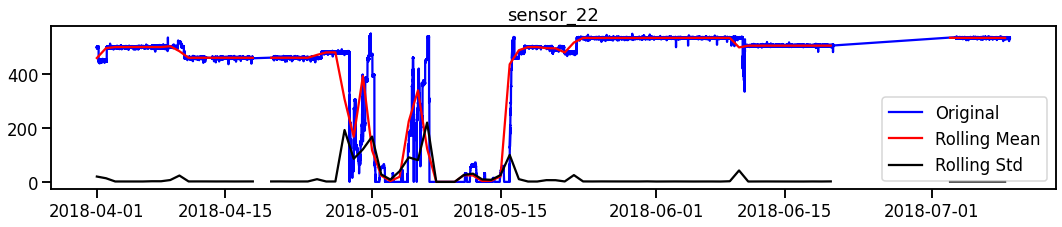

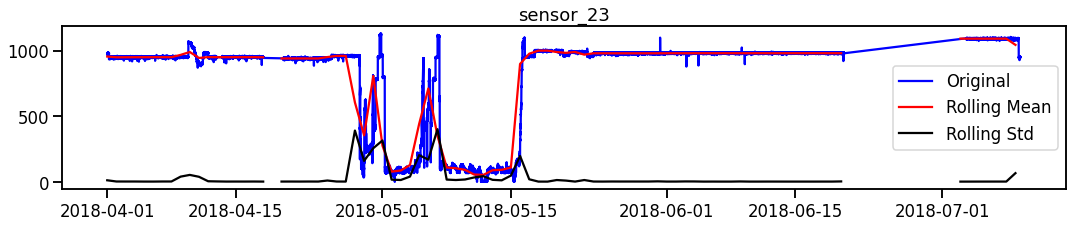

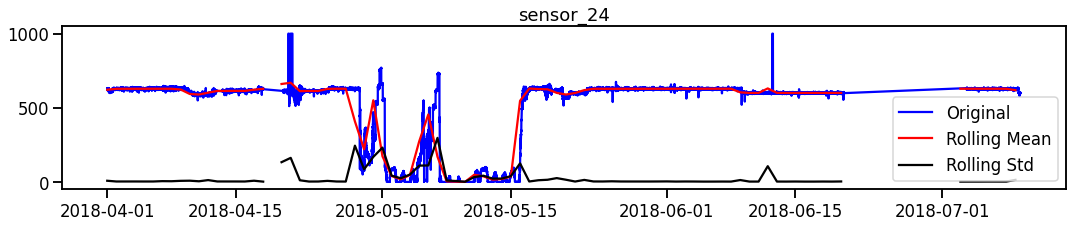

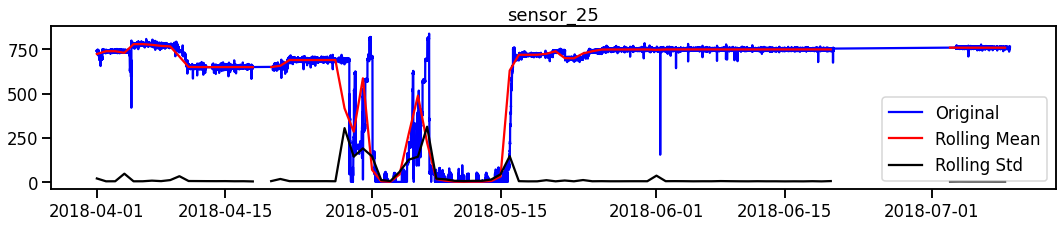

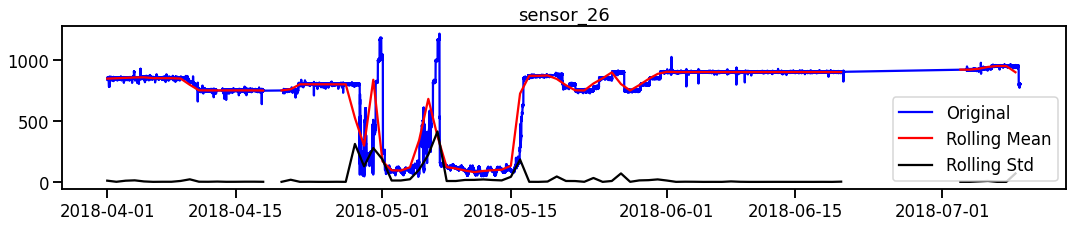

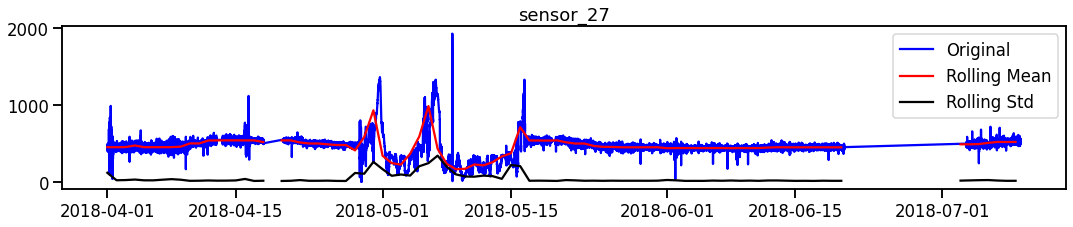

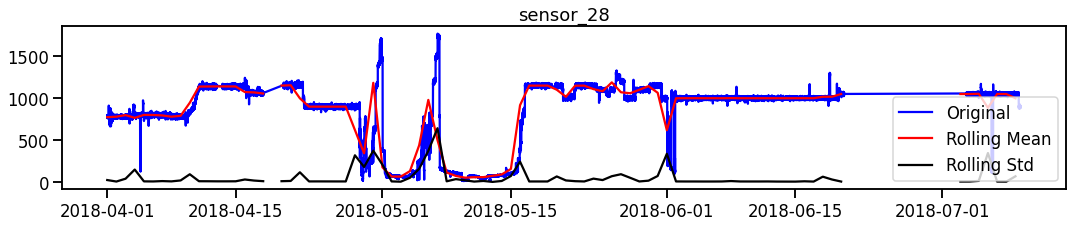

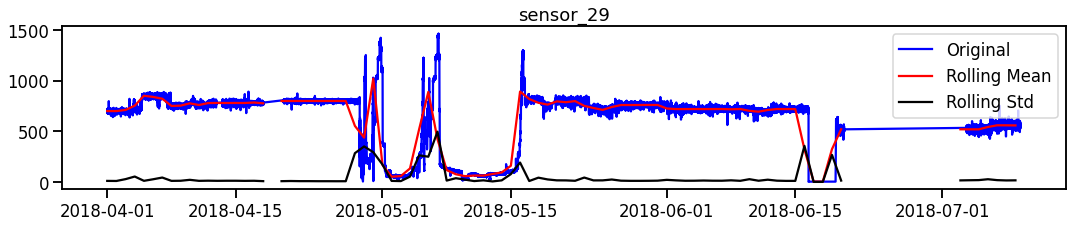

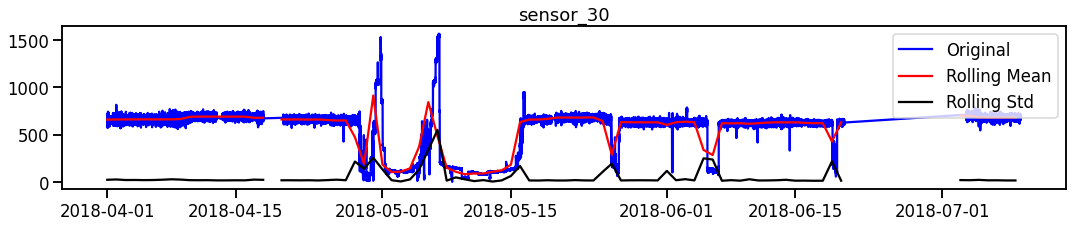

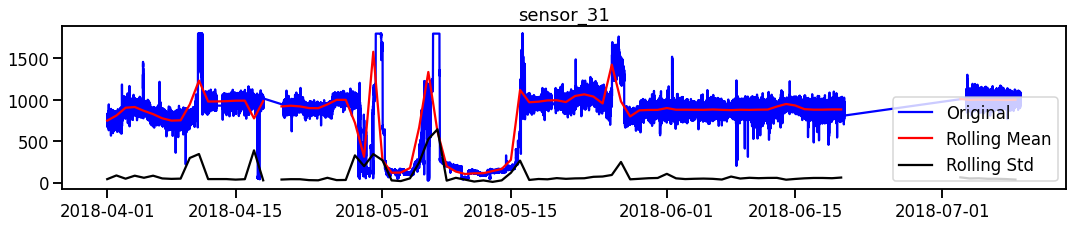

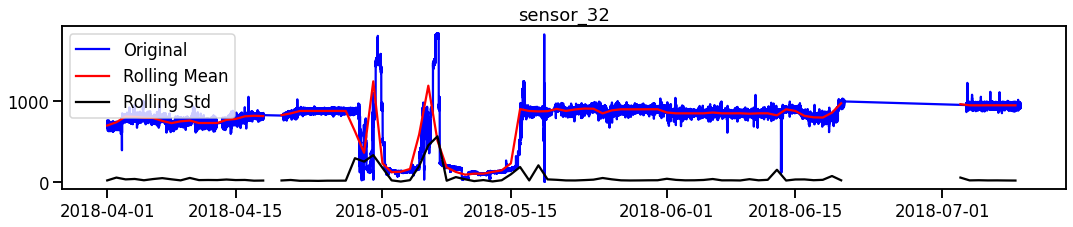

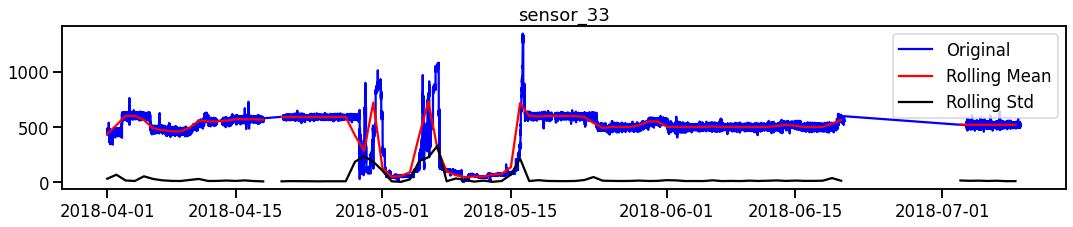

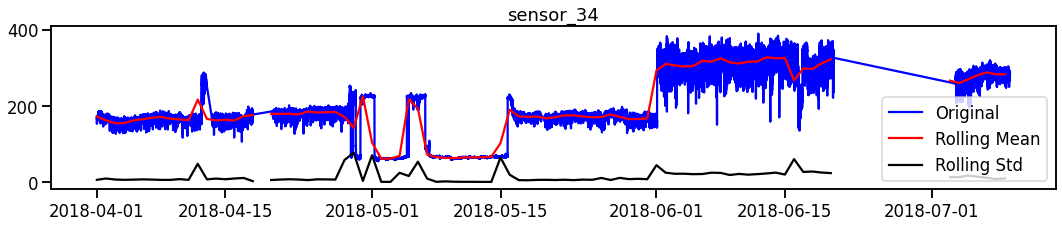

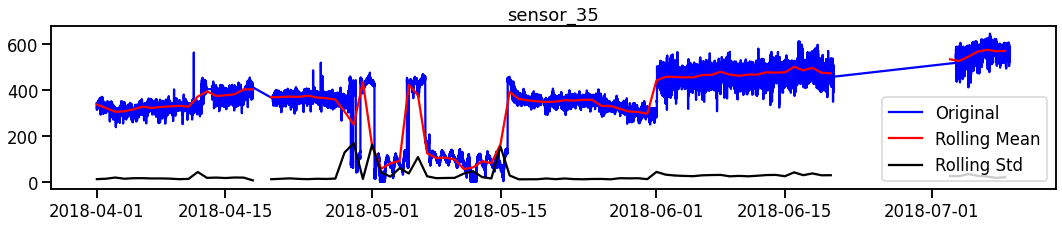

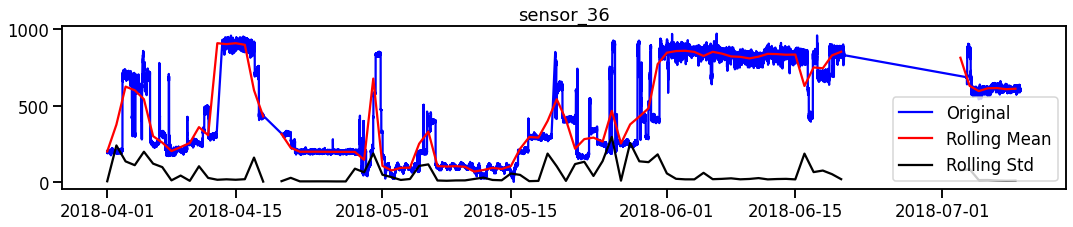

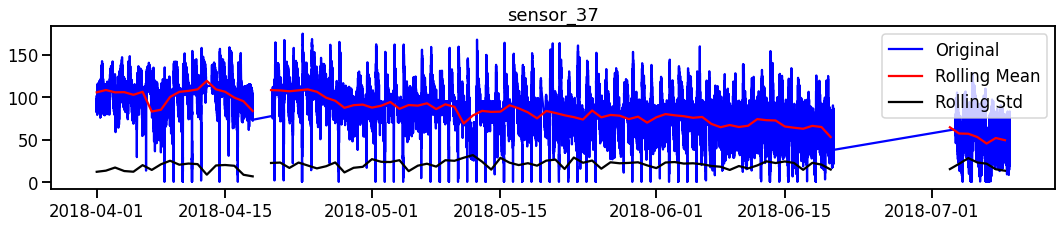

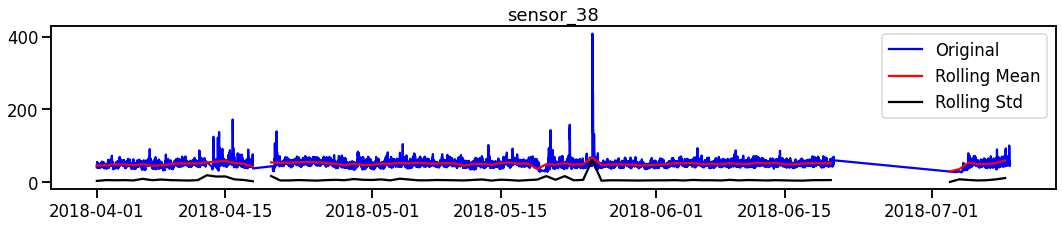

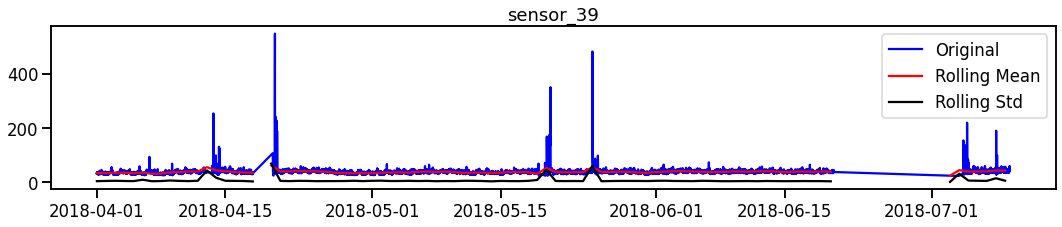

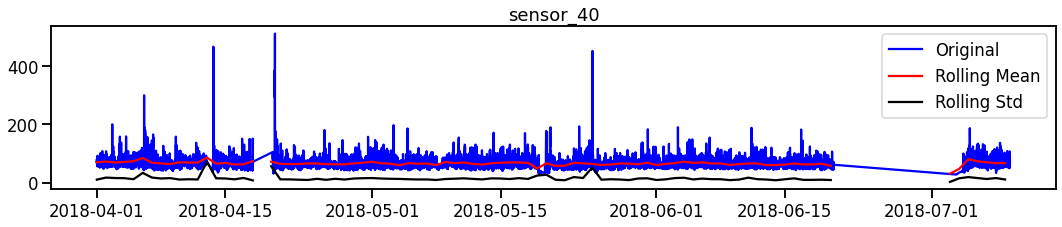

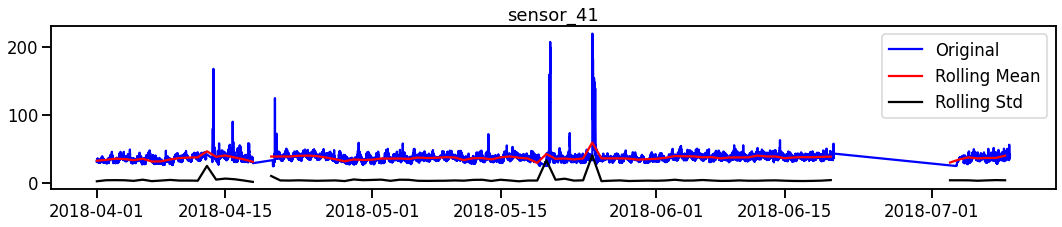

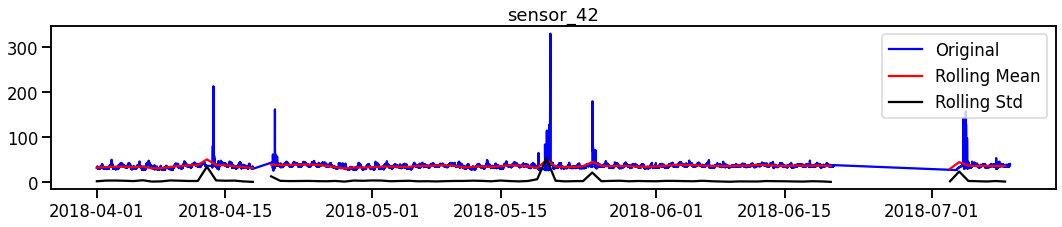

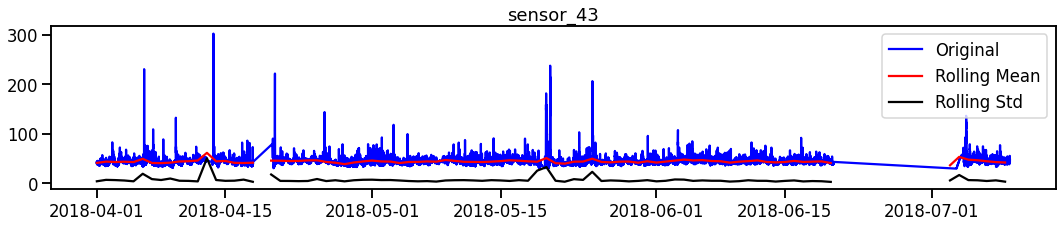

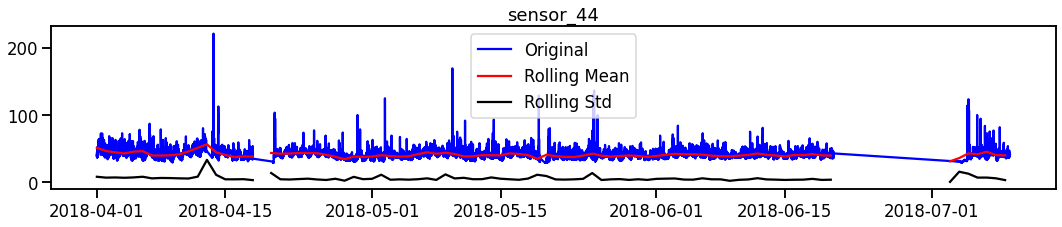

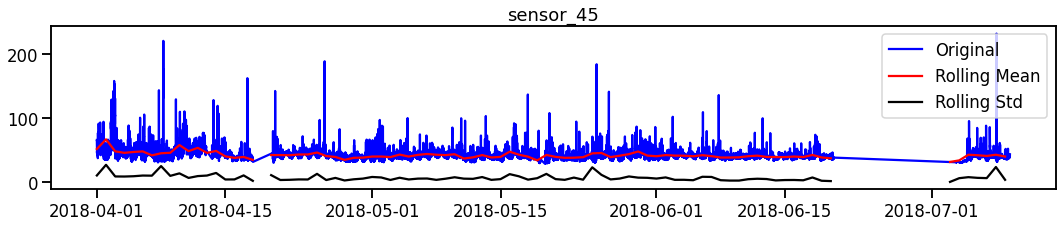

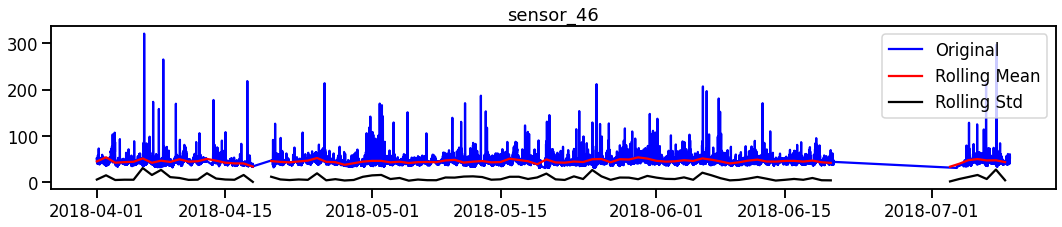

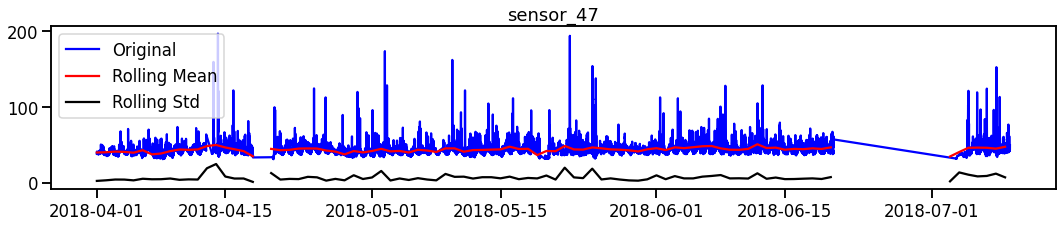

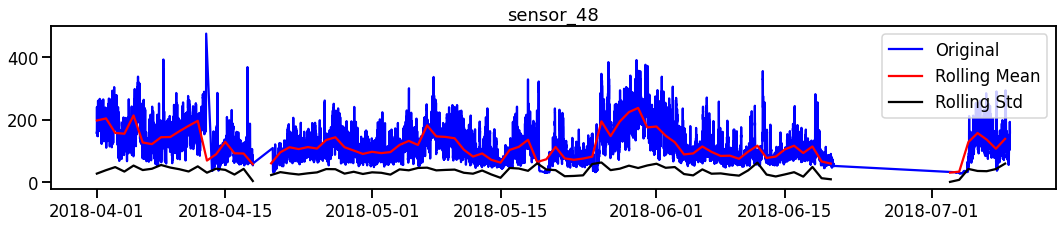

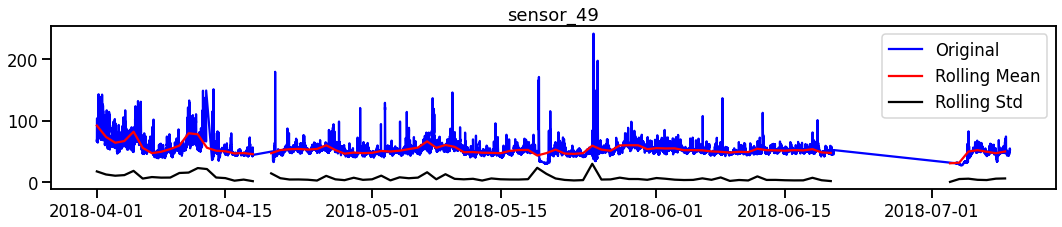

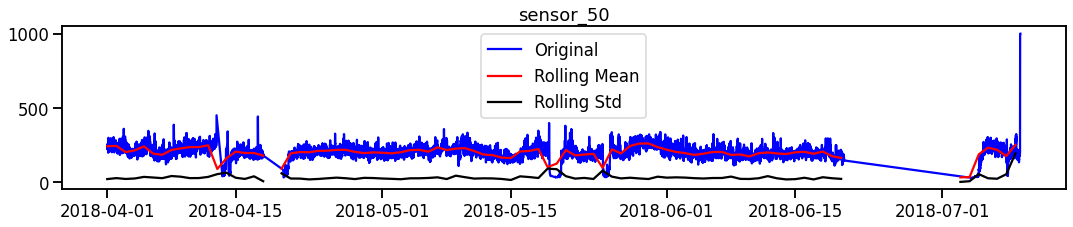

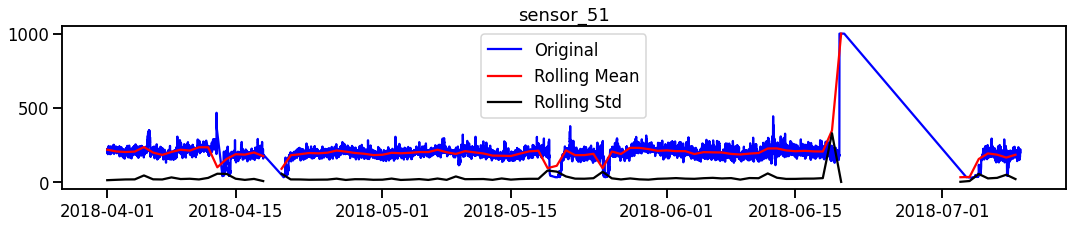

In [ ]:
# Plot time series for each sensor with BROKEN state marked with X in red color
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

In [ ]:

# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Extract the names of the numerical columns
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
x = df[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

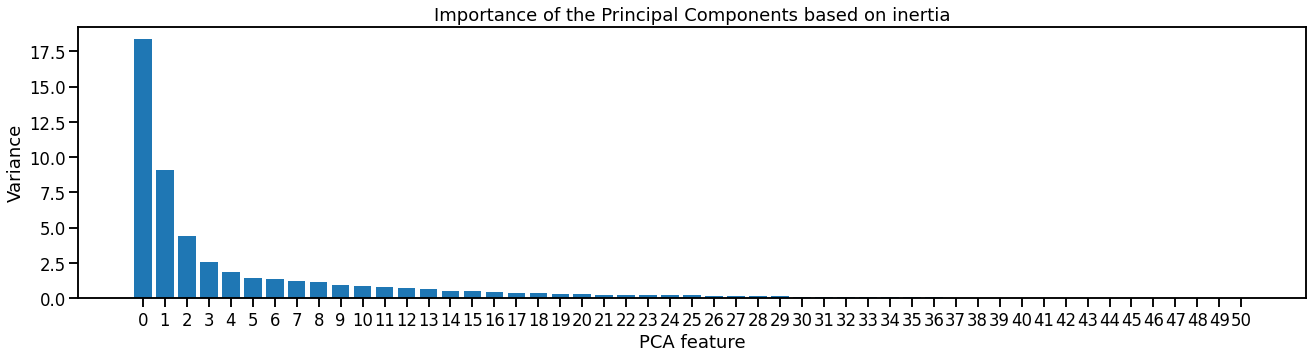

In [ ]:

features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [ ]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [ ]:
df['pc1']=pd.Series(principalDf['pc1'].values, index=df.index)
df['pc2']=pd.Series(principalDf['pc2'].values, index=df.index)

In [ ]:
df.head()


sensor_00  sensor_01  ...         pc1         pc2
date                                       ...                        
2018-04-01 00:00:00   2.465394   47.09201  ... -153.133434  125.889731
2018-04-01 00:01:00   2.465394   47.09201  ... -153.133434  125.889731
2018-04-01 00:02:00   2.444734   47.35243  ... -195.307008  159.980874
2018-04-01 00:03:00   2.460474   47.09201  ... -198.319514  174.653937
2018-04-01 00:04:00   2.445718   47.13541  ... -194.402134  161.620075

[5 rows x 54 columns]

In [ ]:

from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

0.04261171205550198


In [ ]:

# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

6.692823216283742e-05


In [ ]:

# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.041245017279783476


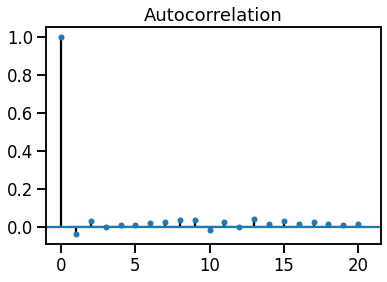

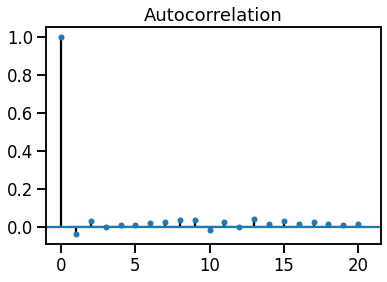

In [ ]:

# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)


In [ ]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.0002992869788291714


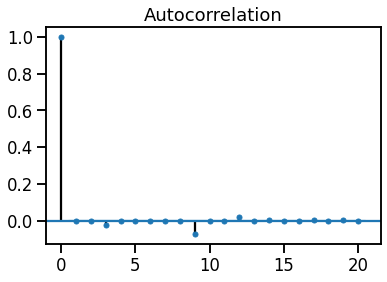

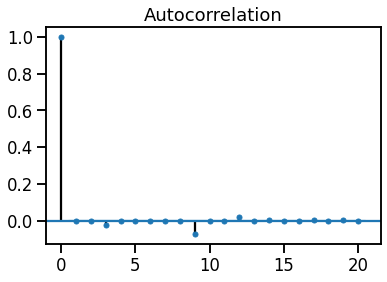

In [ ]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

In [ ]:
# outlier_lower = Q1 - (1.5*IQR)
# outlier_upper = Q3 + (1.5*IQR)
# Calculate outlier bounds for pc1
q1_pc1, q3_pc1 = df['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Calculate outlier bounds for pc2
q1_pc2, q3_pc2 = df['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [ ]:
lower_pc1, upper_pc1


(-920.6192266988296, 147.50792987213657)

In [ ]:
df['anomaly_pc1'] = ((df['pc1']>upper_pc1) | (df['pc1']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['pc2']>upper_pc2) | (df['pc2']<lower_pc2)).astype('int')

In [ ]:
df['anomaly_pc1'].value_counts()


0    94497
1    24606
Name: anomaly_pc1, dtype: int64

In [ ]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x = df.drop(['machine_status', 'pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df['machine_status']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature        Score
0   sensor_00  2658.343326
5   sensor_05  2103.617182
11  sensor_11  1974.828595


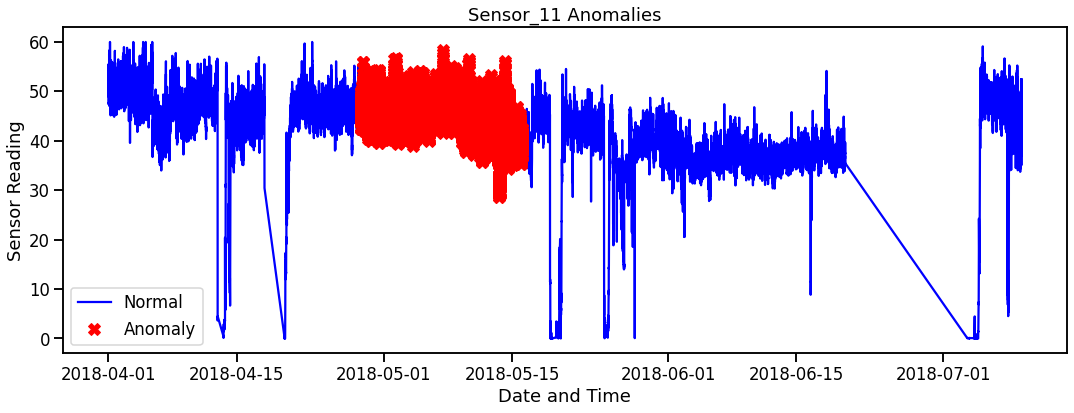

In [ ]:
# Let's plot the outliers from pc1 on top of the sensor_11 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

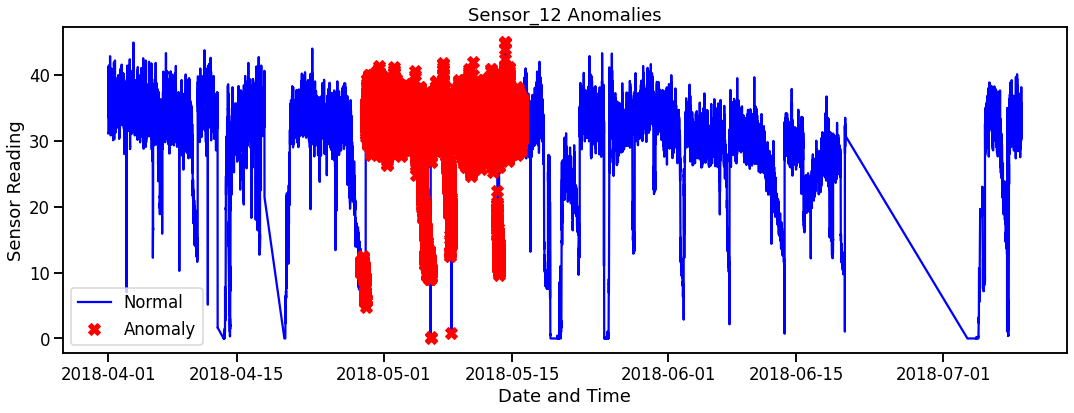

In [ ]:

# Let's plot the outliers from pc2 on top of the sensor_00 see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
# I will start k-means clustering with k=2 as I already know that there are 3 classes of "NORMAL" vs 
# "NOT NORMAL" which are combination of BROKEN" and"RECOVERING"
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

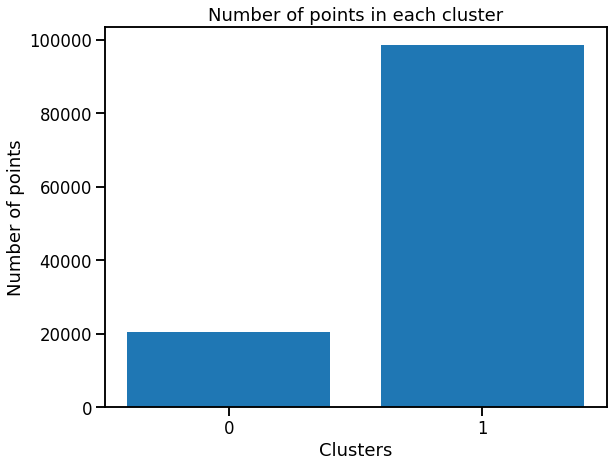

In [ ]:

_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters')
_ = plt.ylabel('Number of points')
_ = plt.title('Number of points in each cluster')
plt.show()

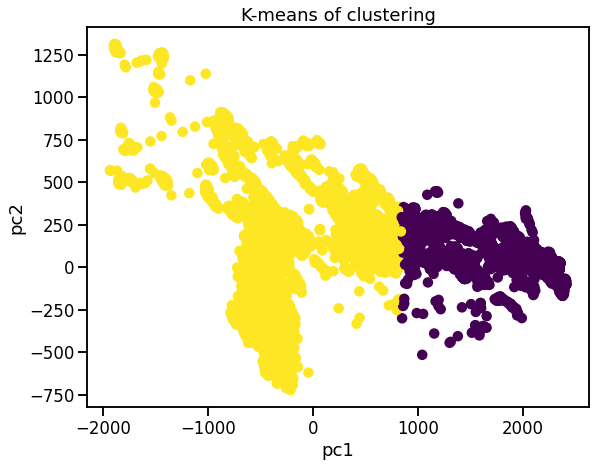

In [ ]:

_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['pc1'], principalDf['pc2'], c=labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-means of clustering')
plt.show()

In [ ]:
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [ ]:
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
principalDf['anomaly1'] = (distance >= threshold).astype(int)

In [ ]:
principalDf.head()


pc1         pc2  anomaly1
0 -153.133434  125.889731         0
1 -153.133434  125.889731         0
2 -195.307008  159.980874         0
3 -198.319514  174.653937         0
4 -194.402134  161.620075         0

In [ ]:
principalDf['anomaly1'].value_counts()


0    103620
1     15483
Name: anomaly1, dtype: int64

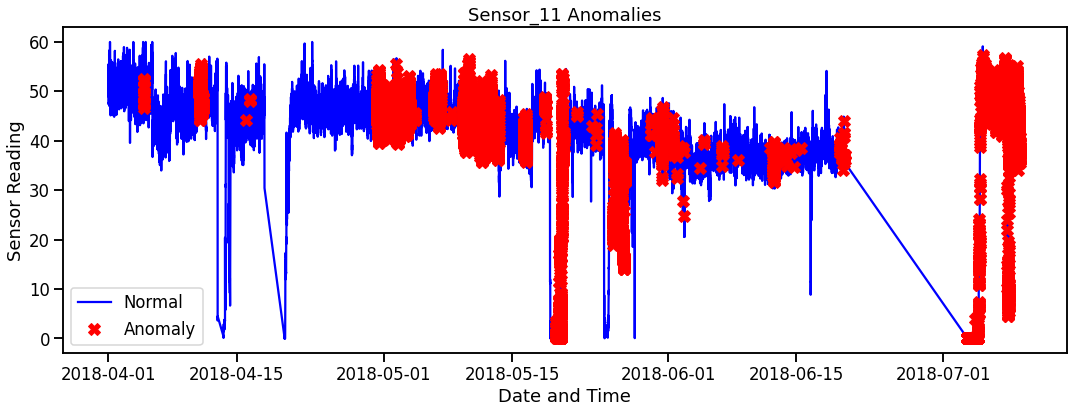

In [ ]:

df['anomaly1'] = pd.Series(principalDf['anomaly1'].values, index=df.index)
a = df[df['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

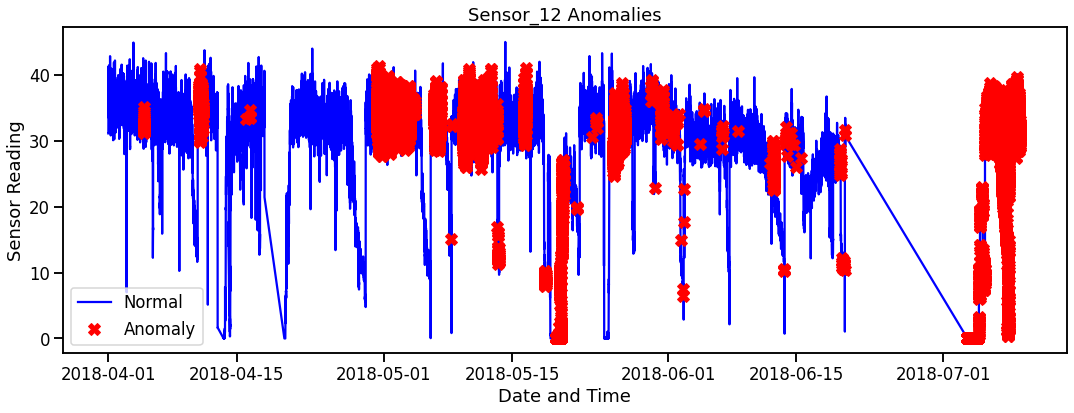

In [ ]:

a = df[df['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show();

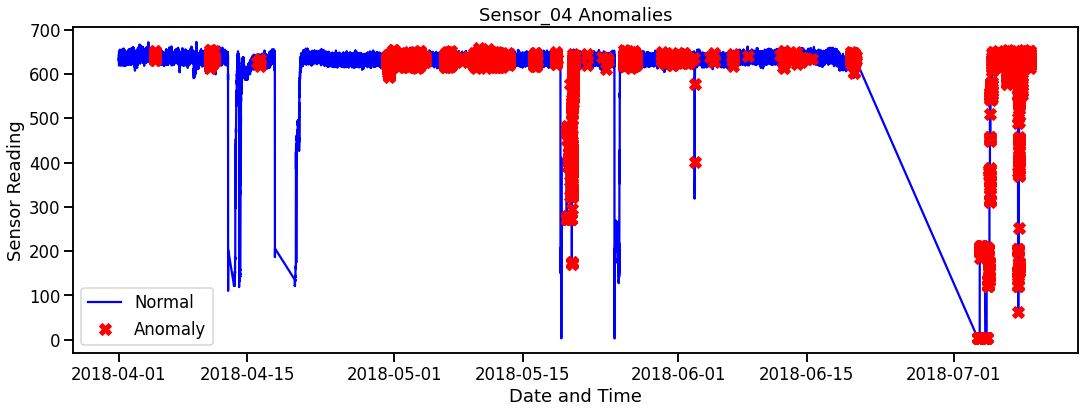

In [ ]:

a = df[df['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='blue', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 Anomalies')
_ = plt.legend(loc='best')
plt.show();